# Full Thesis Code - MATLAB in Jupyter


<div style="background-color:#e8f4fd; padding:12px; border-left:6px solid #2196f3;">
    <strong><b>💡 Notes: </strong></b>
    <br> This is the notebook containing <b>the full model code</b> for my thesis and its ouput. It is set up to use the baseline parameters setup with:
    <b><br> - Logarithmic preferences (sigma = 1)
    <br> - No TFP growth (gZa_Y = 0)
    <br> - Annual discount rate of 1.5% (beta = 0.985)
    <br> - Full depreciation (delta = 1)</b>
</div>

<div style="background-color:#FCDCDC; padding:12px; border-left:6px solid #F57171;">
    <strong><b>❗ Important: </strong></b>
    <br> To run the model in Jupyter, first install the <b>MATLAB kernel</b>:
    <br> - python -m pip install jupyter-matlab-proxy
    <br> - install-matlab-kernelspec
    Then ensure Jupyter is launched from the repository root (the `modeling/` folder)
</div>

In [1]:
cd('C:\Users\Gebruiker\Desktop\thesis\modeling\notebooks\thesis_full')

## Section 1: Model Parameters
Based on Section 1 from nestedcd_Main.m

In [2]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 1: Parameters        %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%Time%%
%%%%%%%%
T = 30;             %Number of direct optimization periods T
y = (1:1:T);        %Corresponding calendar years    
y(1) = 2025;
for i = 1:1:T-1
    y(1+i) = 2025+((i)*10);
end
n = 100;            %Number of pre-balanced growth path simulation periods after T
y2 = (1:1:T+n);     %Corresponding calendar years   
y2(1) = 2025;
   for i = 1:1:T-1+n
       y2(1+i) = 2025+((i)*10);
   end

%%Climate and Damages%%
%%%%%%%%%%%%%%%%%%%%%%%
phi = 0.0228;       %Carbon depreciation per annum (remaining share)
phiL = 0.2;         %Carbon emitted to the atmosphere staying there forever
phi0 = 0.393;       %Share of remaining emissions exiting atmosphere immediately
Sbar = 581;         %Pre-industrial atmospheric GtC
S1_2000 = 103;      %GtC
S2_2000 = 699;      %GtC

%% Climate damage parameter %%
gamma = zeros(T,1); 
for i = 1:1:T
    gamma(i) = 0.000023793; %Damage elasticity
end
 
%%Energy Aggregation%%
%%%%%%%%%%%%%%%%%%%%%%

%%% Option 1 (GHKT) 
% rho = -0.058;               %Elasticity of substitution = 0.945
% kappa1 = 0.5429;            %Relative efficiency of oil
% kappa2 = 0.1015;            %Relative efficiency of coal
% kappa3 = 1-kappa1-kappa2;   %Relative efficiency of low-carbon technologies

%%% Option 2 (Based on change in TWh 2014-2024)
rho = -0.058;
kappa1 = 0.455;
kappa2 = 0.078;
kappa3 = 1 - kappa1 - kappa2; 


%%Final Goods Production%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
N = 1;                      %Normalize population
alpha = 0.33;               %Capital output share
%alpha = 0.66;
Y2024 = 110000;             %Base year (2024) annual GDP in billions of USD
r2024 = 0.05;               %GHKT: Base year annual net rate of return 
r2024d = ((1+r2024)^10)-1;  %GHKT: Base yer decadal net rate of return

%%Depreciation OPTION 1: delta = 100%
delta = 1;                              %Annual depreciation rate
Delta = (1-(1-delta)^10);               %Decadal depreciation rate
K0 = (alpha*Y2024*10)/(r2024d+Delta);   %GHKT Base year capital stock in billions of USD

%%Depreciation OPTION 2: delta = 65%, no recalibration:
% delta = 0.1;                            %Annual depreciation rate
% Delta = (1-(1-delta)^10);               %Decadal depreciation rate
% Delta1 = 1;                             %Decadal 100% depreciation rate
% K0 = (alpha*Y2024*10)/(r2024d+Delta1);  %Base year capital stock in billions of USD

%%Depreciation OPTION 3: delta = 65%, with recalibration:
% delta = 0.1;                            %Annual depreciation rate
% Delta = (1-(1-delta)^10);               %Decadal depreciation rate
% K0 = (alpha*Y2024*10)/(r2024d+Delta);   %Base year capital stock in billions of USD

%Recalibrated Energy (Using IEA data):
 pi00 = 1;               %Base period share of labor devoted to final goods production
 E1_2024 = 55.292;       %x1000 TWh per year
 E2_2024 = 45.851;       %x1000 TWh per year
 E3_2024 = 9.225;        %x1000 TWh per year
 E0_2024 = ((kappa1*E1_2024^rho)+(kappa2*E2_2024^rho)+(kappa3*E3_2024^rho))^(1/rho);
 E0 = E0_2024*10;        %x1000 TWh per decade

%%%Productivity Growth Rates%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%Energy Sector GHKT %%%
% gZa_en = 0.02;                                         %Annual labor productivity growth rate (energy sectors)
% gZ_en = ((1+gZa_en)^10)-1;                             %Decadal labor productivity growth rate (energy sectors)

%%%Energy Sector Productivities%%%
gZa_coal = 0.01;                                         %Annual labor productivity growth rate (coal sectors)
gZ_coal = ((1+gZa_coal)^10)-1;                           %Decadal labor productivity growth rate (coal sectors)

gZa_green = 0.02;                                         %Annual labor productivity growth rate (E3 sectors)
gZ_green = ((1+gZa_green)^10)-1;                          %Decadal labor productivity growth rate (E3 sectors)


%%%Final Goods Sector OPTION 1: Specify Labor Productivity Growth%%%
%           gZa_y = 0.02;                               %Annual labor productivity growth rate in final goods sector
%           gAa_y = (1+gZa_y)^(1-alpha-v);              %Corresponding TFP growth
%           gZd_y = ones(T+n,1)*(((1+gZa_y)^10)-1);     %Decadal labor productivity growth rate (all sectors)
%  
%%%Final Goods Sector OPTION 2: Specify TFP Growth%%%
%            gAa_y = 0.02;                            %Annual TFP growth rate (final output sector)
             gAa_y = 0;                               %Alt. Annual TFP growth rate (final output sector)
             %Commented out for new PF: gZa_y = ((1+gAa_y)^(1/(1-alpha-v)))-1;   %Corresponding annual labor productivity growth rate (final output sector)
             gZa_y = 0;
             gAd_y = ((1+gAa_y)^10)-1;                %Decadal TFP growth rate (final output sector)
             gZd_y = ones(T+n,1)*(((1+gZa_y)^10)-1);  %Decadal labor productivity growth rate (final output sector)
 

%%Final Good Sector TFP Levels%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%COMMENTED OUT FOR NEW PF
% At = zeros(T,1);
% At(1) = A0;                 
% for i = 1:1:T-1;
%   At(i+1) = At(i)*(1+gZd_y(i))^(1-alpha-v);     
% end

%%Long-run Output Growth Rate on BGP%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
gZBGP = gZd_y(T);             
% gZBGP = gZ_en;      %Alternative possible value for gTFP=1.5% to roughly account for declining oil output   

%%Utility%%
%%%%%%%%%%%  
sigma = 1;         %Logarithmic preferences


%%Beta OPTION 1: Specify exogenously%%%
beta = (.985)^10;  
%beta = (.999)^10;


%%Coal production%%
%%%%%%%%%%%%%%%%%%%
A2t = zeros(T,1);
%A2t(1) = 7693;             % GHKT 
A2t(1) = 11169.231;         % x1000 TWh 
for i = 1:1:T-1
    A2t(i+1) = A2t(i)*(1+gZ_coal);
end

%%Coal Emissions%%
%%%%%%%%%%%%%%%%%%%
ypsilon = zeros(T,1);   %Coal carbon emissions coefficient
a_yps = 8;              %Logistic curve coefficient
b_yps = -0.05;          %Logistic curve coefficient
for i = 1:1:T+n
     ypsilon(i) = 1/(1+exp((-1)*(a_yps+b_yps*(i-1)*10)));
     %ypsilon(i) = 1;
end


%%Low Carbon Energy Production%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
A3t = zeros(T,1);
%A3t(1) = 1311;             % GHKT
A3t(1) = 3399.331;          % x1000 TWh
for i = 1:1:T-1
    A3t(i+1) = A3t(i)*(1+gZ_green); 
end

%%Oil%%
%%%%%%%
%R0 = 253.8;                % GHKT
R0 = 2720;                  % x1000 TWh


%%Energy in Final Goods Production%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
en_K = zeros(T,1);
eff_E = zeros(T,1);

eff_E(1) = 0.33;                        % initial energy-to-exergy efficiency
en_K(1) = (eff_E(1) * E0)/(K0*10);      % initial usable energy throughput of capital (x1000 TWh per decade per billion)

%%%Decadal growth rates
gEk = 0.00;                             % growth in energy throughput of capital
gEff = 0.00;                            % growth in energy-to-exergy efficiency
%gEk = 0.01;    
%gEff = 0.02;     

for i = 1:1:T-1
    en_K(i+1) = en_K(i)*(1+gEk)^10;    
    eff_E(i+1) = eff_E(i)*(1+gEff);  
end

%%%%%%   Mineral Parameters  %%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%% Initial mineral stock (MtCu)
M0 = 2000;    
%M0 = 1000;
%M0 = 500;

%%% Initial green capital stock (MtCu)
G0 = 53.8;                                             % MtCu Based on annual demand for clean tech in 2021 * 10
%G0 = 5.38;

%%% Green capital depreciation 
%delta_G = 0.088;                                      % Annual depreciation rate of green capital 
%delta_G = 0.1;                                        % Annual depreciation rate of green capital 
delta_G = 1; 
Delta_G = (1-(1-delta_G)^10);                          % Decadal depreciation rate

%%% Other
rho_E3 = -3;                                            % Parameter of substitution E3
psi = 1.462;                                            % Energy obtained from given amount of green capital, in x1000TWh/MtCu
phi_m = 1;                                              % Efficiency of minerals in producing green capital

%%% Relative efficiencies
kappaM = zeros(T,1);                                   % Relative efficiency of minerals in the production of green capital
kappaL = zeros(T,1);                                   % Relative efficiency of labour in the production of green capital
dkM = 0.00; 
%dkM = 0.002;                                          % Annual decline in relative efficiency of minerals for green capital

kappaM(1) = 0.75;   
kappaL(1) = 1-kappaM(1);
for i = 1:1:T-1
    % kappaM(1+i) = kappaM(1);
    % kappaL(1+i) = 1-kappaM(1);
    kappaM(1+i) = kappaM(i)*(1-dkM)^10;
    kappaL(1+i) = 1-kappaM(1+i);
end                                 


%%% Calibrating eta_GDP
u1_cap = en_K(1) * (K0*10);            % capital-side usable energy at T=1 in x1000TWh per decade 
u1_energy = eff_E(1) * E0;             % energy-side usable energy at T=1 in x1000TWh per decade
usable1 = min(u1_cap, u1_energy); 
Yt1_model = usable1.^alpha;       
eta_GDP = Yt1_model/ (Y2024*10);       % output to GDP conversion (x1000TWh usable energy per 1 billion dollars)       



## Section 2, 3 & 4: Initial Guess, Solver, Objective Function, and Constraints 
Based on section 2 from nestedcd_Main.m, plus nestedcd_Objective.m and nestedcd_Constraints.m

In [3]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 2: Solve for Optimal Choice Variables X        %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

vars = 2*T+3*(T-1);         %Number of variables = 147

%%Define upper and lower bounds%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%NEW
lb = zeros(vars,1);
ub = ones(vars,1);
for i = 1:1:2*T
    ub(2*(T-1)+i) = 1;           %For coal and E3 labor shares 
    lb(2*(T-1)+i) = 0.00000001;  %For coal and E3 labor shares 
end
for i = 1:1:T-1
    ub(i) = 1;                     %For savings rate
    lb(i) = 0.00000001;            %For savings rate
    ub((T-1)+i) = R0;              %For oil stock remaining Rt
    lb((T-1)+i) = 0.00000001;      %For oil stock remaining Rt
    ub(2*(T-1)+2*T+i) = M0;        %For mineral stock remaining 
    lb(2*(T-1)+2*T+i) = 0.00000001;%For mineral stock remaining 
end

%%Make Initial Guess x0%%
%%%%%%%%%%%%%%%%%%%%%%%%%

%%% OPTION 1: USE PREVIOUS RESULTS %%

%% Note: The best x0 can be found by loading the saved output below.
%   Each scenario corresponds to a scenario explicitly mentioned 
%   in the thesis. Load the scenario and then set x0 = x. All file 
%   names indicate the parameters that were changed compared to the
%   baseline, e.g.: 'x_enK_effE_dkdg' 
%   Alternatively, begin from a neutral starting point (OPTION 2);

%%% OPTION 1 - Step 1:  
load('x_baseline','x')                           % (B) Baseline scenario
%load('x_nestedcd_lf','x')                        % (C) Laissez-faire scenario
%load('x_dK','x');                                % (1) Changing kappaM
%load('x_dG','x');                                % (2) Changing delta_G
%load('x_dG_dK','x');                             % (3) Changing kappa M & delta_G
%load('x_enK','x')                                % (4) Changing en_K
%load('x_effE','x');                              % (5) Changing eff_E
%load('x_enK_effE','x');                          % (6) Changing en_K and eff_E
%load('x_enK_effE_dK','x');                       % (7) Changing en_K, eff_E, kappaM
%load('x_enK_effE_dkdg','x');                     % (8) Changing en_K, eff_E, kappaM & delta_G
%load('x_enKy_effE_dkdg','x');                    % (9) Changing en_K, eff_E, kappaM, delta_G and Delta


%%% OPTION 1- Step 2: 
x0 = x;

%%% OPTION 2: NEUTRAL STARTING POINT %%

%x0 = zeros(vars,1);
%for i = 1:1:T-1
     %x0(i) = 0.25;                       %savings rate
     %x0((T-1)+i) = R0-((R0/1.1)/T)*i;    %oil stock remaining
     %x0(2*(T-1)+i) = 0.002;              %labour share coal
     %x0(2*(T-1)+T+i) = 0.01;             %labour share green capital
     %x0(2*(T-1)+2*T+i) = M0-((M0/1.1)/T)*i; %energy share capital
%end
%x0(2*(T-1)+T) = 0.002;
%x0(2*(T-1)+T+T) = 0.01;

%%Check Constraints and Objective Function Value at x0%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

f = nestedcd_Objective(x0,A2t,A3t,Delta,Delta_G,en_K,eff_E,G0,eta_GDP,K0,M0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_coal,gZ_green,gZd_y,gZBGP,gamma,kappaL,kappaM,kappa1,kappa2,kappa3,phi,phi0,phiL,phi_m,psi,rho,rho_E3,sigma,ypsilon);
[c, ceq] = nestedcd_Constraints(x0,A2t,A3t,Delta_G,Delta,en_K,eff_E,G0,eta_GDP,K0,M0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_coal,gZ_green,gZd_y,gZBGP,gamma,kappaL,kappaM,kappa1,kappa2,kappa3,phi,phi0,phiL,phi_m,psi,rho,rho_E3,sigma,ypsilon);

%%%%%%%%%%%
%%%SOLVE%%%
%%%%%%%%%%%

% Algorithm changed from interior-point (GHKT) to active-set (current);
options = optimoptions(@fmincon,'Tolfun',1e-12,'TolCon',1e-12,'MaxFunEvals',500000,'MaxIter',6200,'Display','iter','MaxSQPIter',10000,'Algorithm','interior-point');
[x, fval,exitflag] = fmincon(@(x)nestedcd_Objective(x,A2t,A3t,Delta,Delta_G,en_K,eff_E,G0,eta_GDP,K0,M0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_coal,gZ_green,gZd_y,gZBGP,gamma,kappaL,kappaM,kappa1,kappa2,kappa3,phi,phi0,phiL,phi_m,psi,rho,rho_E3,sigma,ypsilon), x0, [], [], [], [], lb, ub, @(x)nestedcd_Constraints(x,A2t,A3t,Delta,Delta_G,en_K,eff_E,G0,eta_GDP,K0,M0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_coal,gZ_green,gZd_y,gZBGP,gamma,kappaL,kappaM,kappa1,kappa2,kappa3,phi,phi0,phiL,phi_m,psi,rho,rho_E3,sigma,ypsilon), options);


%%Save Output%%
%%%%%%%%%%%%%%%
%File name structure:
%x_scenario_version

%save('x_baseline','x')                           % (B) Baseline scenario
%save('x_nestedcd_lf','x')                        % (C) Laissez-faire scenario
%save('x_dK','x');                                % (1) Changing kappaM
%save('x_dG','x');                                % (2) Changing delta_G
%save('x_dG_dK','x');                             % (3) Changing kappa M & delta_G
%save('x_enK','x')                                % (4) Changing en_K
%save('x_effE','x');                              % (5) Changing eff_E
%save('x_enK_effE','x');                          % (6) Changing en_K and eff_E
%save('x_enK_effE_dK','x');                       % (7) Changing en_K, eff_E, kappaM
%save('x_enK_effE_dkdg','x');                     % (8) Changing en_K, eff_E, kappaM & delta_G
%save('x_enKy_effE_dkdg','x');                    % (9) Changing en_K, eff_E, kappaM, delta_G and Delta



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 3: Objective function (nesdtedcd_Objective.m)  %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
function f = nestedcd_Objective(x,A2t,A3t,Delta,Delta_G,en_K,eff_E,G0,eta_GDP,K0,M0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_coal,gZ_green,gZd_y,gZBGP,gamma,kappaL,kappaM,kappa1,kappa2,kappa3,phi,phi0,phiL,phi_m,psi,rho,rho_E3,sigma,ypsilon) 

%%Compute consumption based on x = [{Kt+1},{Rt+1},{pi0t},{pi2t}]:
%Step 1: Compute implied energy inputs
%Step 2: Compute carbon emissions and concentrations
%Step 3: Compute output and consumption

%%Step 4: Evaluate objective function at {Ct}

%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 1: Energy Inputs%%
%%%%%%%%%%%%%%%%%%%%%%%%%

oil = zeros(T,1);
    oil(1) = R0-x(T);
for i = 1:1:T-2
    oil(1+i) = x(T+i-1)-x(T+i);
end
    ex_Oil = (x(T-1+T-2)-x(T-1+T-1))/(x(T-1+T-2));    %Fraction of oil left extracted in period T-1
    oil(T) = x(T-1+T-1)*ex_Oil;
ex_rates = zeros(T-1,1);
for i = 1:1:T-1
    ex_rates(i) = oil(i)/x(T+i-1);
end
coal = zeros(T,1);
for i = 1:1:T
    coal(i) = x(2*(T-1)+i)*A2t(i)*N;
end
% wind = zeros(T,1);
% for i = 1:1:T;
%     wind(i) = x(2*(T-1)+T+i)*(A3t(i)*N);
% end
%%%%%% INDEX FOR MINERAL STOCK = x0(2*(T-1)+2*T+i)
mineral = zeros(T,1);
    mineral(1) = M0-x(2*(T-1)+2*T+1);
for i = 1:1:T-2
    mineral(1+i) = x(2*(T-1)+2*T+i)-x(2*(T-1)+2*T+i+1);
end
    ex_Min = (x(2*(T-1)+2*T+(T-3))-x(2*(T-1)+2*T+(T-2)))/(x(2*(T-1)+2*T+(T-3)));    %Fraction of minerals left extracted in period T-1
    mineral(T) = x(2*(T-1)+2*T+(T-2))*ex_Min;


%% Index for labour share Green Energy = x0(2*(T-1)+T+i)
%%Green capital production
green = zeros(T,1);
for i = 1:1:T
     green(i) = (((kappaL(i)*(x(2*(T-1)+T+i)*A3t(i)*N)^rho_E3)+(kappaM(i)*(phi_m*mineral(i))^rho_E3)))^(1/rho_E3);
end

%%Green capital stock (comment out for Delta_G = 1)
Gt1 = zeros(T,1);
Gt1(1) = green(1)+(1-Delta_G)*G0;
for i = 1:1:T-2
    Gt1(1+i) = green(1+i)+(1-Delta_G)*Gt1(i);
end
 Gt1(T) = green(T)+(1-Delta_G)*Gt1(T-1);

%%Low carbon energy production, eq (10)
E3 = zeros(T,1);
for i = 1:1:T
       E3(i) = psi*Gt1(i);
end
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

energy = zeros(T,1);
for i = 1:1:T 
    energy(i) = ((kappa1*oil(i)^rho)+(kappa2*coal(i)^rho)+(kappa3*E3(i)^rho))^(1/rho);
end


%% compute fossil fuel use
fossil_fuel = zeros(T,1);
for i = 1:1:T
    fossil_fuel(i) = oil(i) + coal(i);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 2: Carbon Emissions and Concentrations%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

emiss = zeros(T,1);
for i = 1:1:T
    emiss(i) = oil(i)+ypsilon(i)*coal(i);
end

S1t = zeros(T,1);        %Non-depreciating stock
S2t_Sbar = zeros(T,1);   %Depreciating stock (S2t-Sbar)
St = zeros(T,1);         %Total carbon concentrations

S1t(1) = S1_2000+phiL*emiss(1);
S2t_Sbar(1) = (1-phi)*(S2_2000-Sbar)+phi0*(1-phiL)*emiss(1);
St(1) = Sbar+S1t(1)+S2t_Sbar(1);

for i = 1:1:T-1
    S1t(1+i) = S1t(i)+phiL*emiss(1+i);
    S2t_Sbar(1+i) = (1-phi)*S2t_Sbar(i)+phi0*(1-phiL)*emiss(1+i);
    St(1+i) = Sbar+S1t(1+i)+S2t_Sbar(1+i);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption through T%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%LF: Indicates production function under laissez-faire scenario, without carbon taxation.

Yt = zeros(T,1);
Ct = zeros(T,1);
Kt1 = zeros(T,1);
GDP = zeros(T,1);
Yt(1) = (exp((-gamma(1))*(St(1)-Sbar)))*(min(en_K(1)*K0,eff_E(1)*energy(1))^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha));
    %LF: Yt(1) = (min(en_K(1)*K0,eff_E(1)*energy(1))^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha));
    GDP(1) = Yt(1)/(eta_GDP);
Ct(1) = (1-x(1))*GDP(1);
Kt1(1) = x(1)*GDP(1)+(1-Delta)*K0;
for i = 1:1:T-2
    Yt(1+i) = (exp((-gamma(1+i))*(St(1+i)-Sbar)))*(min(en_K(1+i)*Kt1(i),eff_E(1+i)*energy(1+i))^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha));
          %:F: Yt(1+i) = (min(en_K(1+i)*Kt1(i),eff_E(1+i)*energy(1+i))^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha));
    GDP(1+i) = Yt(1+i)/(eta_GDP);  %in billion dollars
    Kt1(1+i) = x(1+i)*GDP(1+i)+(1-Delta)*Kt1(i);
    Ct(1+i) = (1-x(i+1))*GDP(1+i); 
end
Yt(T) =  (exp((-gamma(T))*(St(T)-Sbar)))*(min(en_K(T)*Kt1(T-1),eff_E(T)*energy(T))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));
    %LF: Yt(T) =  (min(en_K(T)*Kt1(T-1),eff_E(T)*energy(T))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));
GDP(T) = Yt(T)/eta_GDP;
theta = x(T-1);
Ct(T) = GDP(T)*(1-theta);
Kt1(T) = theta*GDP(T)+(1-Delta)*Kt1(T-1);

%Compare savings rate theta to predicted BGP savings rate:
%theta_BGP = alpha*(((((1+gZBGP)^sigma)/beta)-(1-Delta))^(-1))*(1+gZBGP-1+Delta)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption past T to T+n%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
n = 100;
Ktn = zeros(n+1,1);
Ytn = zeros(n,1);
GDPn = zeros(n,1);
Ktn(1) = Kt1(T); 
oiln = zeros(n,1);
En = zeros(n,1);
minbgp = zeros(n,1);
greenbgp = zeros(n,1);
E3bgp = zeros(n,1);
Gtn = zeros(n+1,1);
Gtn(1) = Gt1(T);


for i = 1:1:n
    oiln(i) = ex_Oil*x(2*(T-1))*((1-ex_Oil)^i);     %Oil continues to be extracted at rate from period T-1
    minbgp(i) = ex_Min*x(2*(T-1)+2*T+(T-1))*((1-ex_Min)^i);
    greenbgp(i) = ((kappaL(T)*(x(2*(T-1)+2*T)*(A3t(T)*(1+gZ_green)^i)^rho_E3)+(kappaM(T)*minbgp(i))^(rho_E3)))^(1/rho_E3);
    Gtn(i+1) = greenbgp(i) + (1-Delta_G)*Gtn(i);
    E3bgp(i) = psi*Gtn(i);
    En(i) = ((kappa1*oiln(i)^rho)+(kappa2*(coal(T)*(1+gZ_coal)^i)^rho)+(kappa3*E3bgp(i)^rho))^(1/rho);
    Ytn(i) =  (exp((-gamma(T))*(St(T)-Sbar)))*(min(en_K(T)*Ktn(i),eff_E(T)*En(i))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));    
        %Ytn(i) = (min(en_K(T)*Ktn(i),eff_E(T)*En(i))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));     
    GDPn(i) = Ytn(i)/eta_GDP;
    Ct(T+i) = (1-theta)*GDPn(i);
    Ktn(i+1) = theta*GDPn(i)+(1-Delta)*Ktn(i);
    Yt(T+i) = Ytn(i);
end


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 4: Compute Utility%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

ct = zeros(T+n,1);
for i = 1:1:T+n
    ct(i) = Ct(i)/1000000;  %Re-scale units
end

U = zeros(T+n,1);

for i = 1:1:T+n-1
    if Ct(i)<0
        U(i) = -99;
    else
        if sigma~=1
             U(i) =(beta^(i-1))*(((ct(i))^(1-sigma))-1)/(1-sigma);
        else
            U(i) = (beta^(i-1))*log(ct(i));
        end
    end
end

   if Ct(T+n)<0
       Ucont = -99;
   else
       if sigma~=1
            Ucont = (beta^(T+n-1))*(((ct(T+n)^(1-sigma))-1)/(1-sigma))*(1/(1-beta*((1+gZBGP)^(1-sigma))));
       else
            Ucont = (beta^(T+n-1))*log(ct(T+n))*(1/(1-beta*((1+gZBGP)^(1-sigma))));
       end
   end
  

 f = (-1)*(sum(U)+Ucont);
end


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 4: Constraints  (nestedcd_Constraints.m)       %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

function [c, ceq] = nestedcd_Constraints(x,A2t,A3t,Delta,Delta_G,en_K,eff_E,G0,eta_GDP,K0,M0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_coal,gZ_green,gZd_y,gZBGP,gamma,kappaL,kappaM,kappa1,kappa2,kappa3,phi,phi0,phiL,phi_m,psi,rho,rho_E3,sigma,ypsilon)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%Positive Consumption Constraint & Positive Oil Constraint%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


%%Compute consumption and oil resources based on x = [{Kt+1},{Rt+1},{pi0t},{pi2t}]:
%Step 1: Compute implied energy inputs
%Step 2: Compute carbon emissions and concentrations
%Step 3: Compute output and consumption

%c = zeros(2*T+1,1);      % without mineral constraints 
c = zeros(3*T+2,1);       % with mineral constraints


%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 1: Energy Inputs%%
%%%%%%%%%%%%%%%%%%%%%%%%%

oil = zeros(T,1);
    oil(1) = R0-x(T);
for i = 1:1:T-2
    oil(1+i) = x(T+i-1)-x(T+i);
end
    ex_Oil = (x(T-1+T-2)-x(T-1+T-1))/(x(T-1+T-2));    %Fraction of oil left extracted in period T-1
    oil(T) = x(T-1+T-1)*ex_Oil;
 for i = 1:1:T
     c(T+i) = (-1)*(oil(i)-0.0001);                   %Positive oil constraint
 end
    c(2*T+1) = (ex_Oil-1);
coal = zeros(T,1);
for i = 1:1:T
    coal(i) = x(2*(T-1)+i)*(A2t(i)*N);
end

%% Without mineral constraints (same as GHKT)
% wind = zeros(T,1);
% for i = 1:1:T;
%     wind(i) = x(2*(T-1)+T+i)*(A3t(i)*N);
% end

%%%%%% INDEX FOR MINERAL STOCK = x0(2*(T-1)+2*T+i)
mineral = zeros(T,1);
    mineral(1) = M0-x(2*(T-1)+2*T+1);
for i = 1:1:T-2
    mineral(1+i) = x(2*(T-1)+2*T+i)-x(2*(T-1)+2*T+i+1);
end
    ex_Min = (x(2*(T-1)+2*T+(T-3))-x(2*(T-1)+2*T+(T-2)))/(x(2*(T-1)+2*T+(T-3)));    %Fraction of minerals left extracted in period T-1
    mineral(T) = x(2*(T-1)+2*T+(T-2))*ex_Min;
for i = 1:1:T
    c(2*T+1+i) = (-1)*(mineral(i)-0.0001);                                 %Positive mineral constraint
end
    c(3*T+2) = (ex_Min-1);


%% Index for labour share Green Energy = x0(2*(T-1)+T+i)
%%Green capital production
green = zeros(T,1);
for i = 1:1:T
    green(i) = (((kappaL(i)*(x(2*(T-1)+T+i)*A3t(i)*N)^rho_E3)+(kappaM(i)*(phi_m*mineral(i))^rho_E3)))^(1/rho_E3);
end

%%Green capital stock (comment out for Delta_G = 1)
Gt1 = zeros(T,1);
Gt1(1) = green(1)+(1-Delta_G)*G0;
for i = 1:1:T-2
    Gt1(1+i) = green(1+i)+(1-Delta_G)*Gt1(i);
end
 Gt1(T) = green(T)+(1-Delta_G)*Gt1(T-1);

%%Low carbon energy production, eq (10)
E3 = zeros(T,1);
for i = 1:1:T
       E3(i) = psi*Gt1(i);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
energy = zeros(T,1);
for i = 1:1:T
    energy(i) = ((kappa1*oil(i)^rho)+(kappa2*coal(i)^rho)+(kappa3*E3(i)^rho))^(1/rho);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 2: Carbon Emissions and Concentrations%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

emiss = zeros(T,1);
for i = 1:1:T
    emiss(i) = oil(i)+ypsilon(i)*coal(i);
end

S1t = zeros(T,1);        %Non-depreciating stock
S2t_Sbar = zeros(T,1);   %Depreciating stock (S2t-Sbar)
St = zeros(T,1);         %Total carbon concentrations

S1t(1) = S1_2000+phiL*emiss(1);
S2t_Sbar(1) = (1-phi)*(S2_2000-Sbar)+phi0*(1-phiL)*emiss(1);
St(1) = Sbar+S1t(1)+S2t_Sbar(1);

for i = 1:1:T-1
    S1t(1+i) = S1t(i)+phiL*emiss(1+i);
    S2t_Sbar(1+i) = (1-phi)*S2t_Sbar(i)+phi0*(1-phiL)*emiss(1+i);
    St(1+i) = Sbar+S1t(1+i)+S2t_Sbar(1+i);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption through T%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Yt = zeros(T,1);
Ct = zeros(T,1);
Kt1 = zeros(T,1);
GDP = zeros(T,1);
Yt(1) = (exp((-gamma(1))*(St(1)-Sbar)))*(min(en_K(1)*K0,eff_E(1)*energy(1))^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha));
    %Yt(1) = (min(en_K(1)*K0,eff_E(1)*energy(1))^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha));
    GDP(1) = Yt(1)/(eta_GDP);
Ct(1) = (1-x(1))*GDP(1);
Kt1(1) = x(1)*GDP(1)+(1-Delta)*K0;
for i = 1:1:T-2
    Yt(1+i) = (exp((-gamma(1+i))*(St(1+i)-Sbar)))*(min(en_K(1+i)*Kt1(i),eff_E(1+i)*energy(1+i))^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha));
          %Yt(1+i) = (min(en_K(1+i)*Kt1(i),eff_E(1+i)*energy(1+i))^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha));
    GDP(1+i) = Yt(1+i)/(eta_GDP);  %in billion dollars
    Kt1(1+i) = x(1+i)*GDP(1+i)+(1-Delta)*Kt1(i);
    Ct(1+i) = (1-x(i+1))*GDP(1+i); 
end
Yt(T) =  (exp((-gamma(T))*(St(T)-Sbar)))*(min(en_K(T)*Kt1(T-1),eff_E(T)*energy(T))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));
    %Yt(T) =  (min(en_K(T)*Kt1(T-1),eff_E(T)*energy(T))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));
GDP(T) = Yt(T)/eta_GDP;
theta = x(T-1);
Ct(T) = GDP(T)*(1-theta);
Kt1(T) = theta*GDP(T)+(1-Delta)*Kt1(T-1);

%Compare savings rate theta to predicted BGP savings rate:
%theta_BGP = alpha*(((((1+gZBGP)^sigma)/beta)-(1-Delta))^(-1))*(1+gZBGP-1+Delta)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption past T to T+n%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
n = 100;
Ktn = zeros(n+1,1);
Ytn = zeros(n,1);
GDPn = zeros(n,1);
Ktn(1) = Kt1(T); 
oiln = zeros(n,1);
En = zeros(n,1);
minbgp = zeros(n,1);
greenbgp = zeros(n,1);
E3bgp = zeros(n,1);
Gtn = zeros(n+1,1);
Gtn(1) = Gt1(T);


for i = 1:1:n
    oiln(i) = ex_Oil*x(2*(T-1))*((1-ex_Oil)^i);     %Oil continues to be extracted at rate from period T-1
    minbgp(i) = ex_Min*x(2*(T-1)+2*T+(T-1))*((1-ex_Min)^i);
    greenbgp(i) = ((kappaL(T)*(x(2*(T-1)+2*T)*(A3t(T)*(1+gZ_green)^i)^rho_E3)+(kappaM(T)*minbgp(i))^(rho_E3)))^(1/rho_E3);
    Gtn(i+1) = greenbgp(i) + (1-Delta_G)*Gtn(i);
    E3bgp(i) = psi*Gtn(i);
    En(i) = ((kappa1*oiln(i)^rho)+(kappa2*(coal(T)*(1+gZ_coal)^i)^rho)+(kappa3*E3bgp(i)^rho))^(1/rho);
    Ytn(i) =  (exp((-gamma(T))*(St(T)-Sbar)))*(min(en_K(T)*Ktn(i),eff_E(T)*En(i))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));    
        %Ytn(i) = (min(en_K(T)*Ktn(i),eff_E(T)*En(i))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));     
    GDPn(i) = Ytn(i)/eta_GDP;
    Ct(T+i) = (1-theta)*GDPn(i);
    Ktn(i+1) = theta*GDPn(i)+(1-Delta)*Ktn(i);
    Yt(T+i) = Ytn(i);
end




%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Positive Consumption Constraint:%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for i = 1:1:T
    c(i) = (-1)*(Ct(i)-0.0001);
end


%%%Equality Constraint for Benchmark Case%%%
ceq = [];
end


                                            First-order      Norm of
 Iter F-count            f(x)  Feasibility   optimality         step
    0     148    8.470166e+00    0.000e+00    2.334e-03
    1     337    8.470166e+00    0.000e+00    2.341e-03    3.232e-08

Local minimum possible. Constraints satisfied.

fmincon stopped because the size of the current step is less than
the value of the step size tolerance and constraints are 
satisfied to within the value of the constraint tolerance.



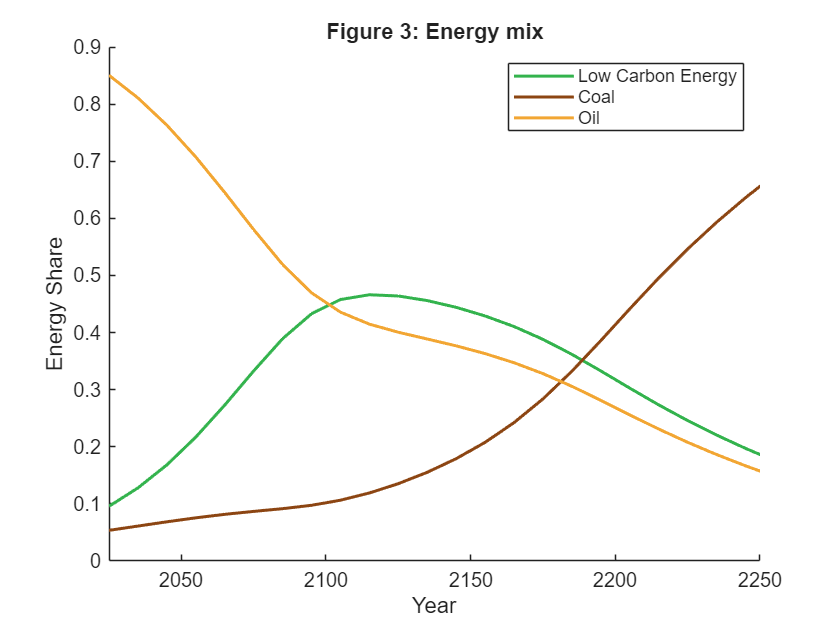

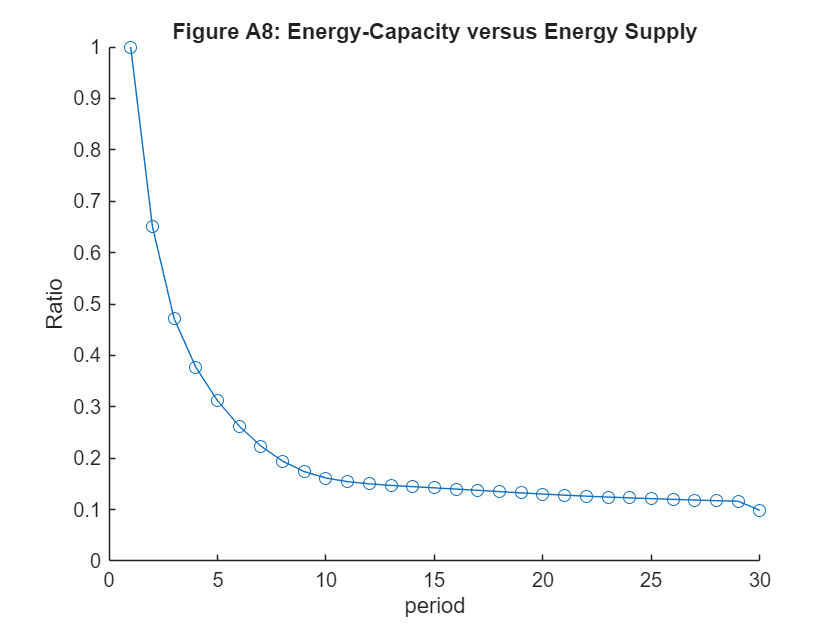

In [4]:


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 3: Compute Allocations and Carbon Taxes  %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%   Energy Production   %%
%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%% Oil in x1000 TWh 
oil = zeros(T,1);
    oil(1) = R0-x(T);
for i = 1:1:T-2
    oil(1+i) = x(T+i-1)-x(T+i);
end
    ex_Oil = (x(T-1+T-2)-x(T-1+T-1))/(x(T-1+T-2));    %Fraction of oil left extracted in period T-1
    oil(T) = x(T-1+T-1)*ex_Oil;
ex_rates = zeros(T-1,1);
for i = 1:1:T-1
    ex_rates(i) = oil(i)/x(T+i-1);
end

%%% Coal in x1000 TWh 
coal = zeros(T,1);
for i = 1:1:T
    coal(i) = x(2*(T-1)+i)*A2t(i)*N;
end

%%% Minerals in MtCu 
mineral = zeros(T,1);
    mineral(1) = M0-x(2*(T-1)+2*T+1);
for i = 1:1:T-2
    mineral(1+i) = x(2*(T-1)+2*T+i)-x(2*(T-1)+2*T+i+1);
end
    ex_Min = (x(2*(T-1)+2*T+(T-3))-x(2*(T-1)+2*T+(T-2)))/(x(2*(T-1)+2*T+(T-3)));    %Fraction of minerals left extracted in period T-1
    mineral(T) = x(2*(T-1)+2*T+(T-2))*ex_Min;

%%% Green capital (flow) in MtCu 
green = zeros(T,1);
for i = 1:1:T
     green(i) = (((kappaL(i)*(x(2*(T-1)+T+i)*A3t(i)*N)^rho_E3)+(kappaM(i)*(phi_m*mineral(i))^rho_E3)))^(1/rho_E3);
end

%%% Green capital (stock) in MtCu
Gt1 = zeros(T,1);
Gt1(1) = green(1)+(1-Delta_G)*G0;
for i = 1:1:T-2
    Gt1(1+i) = green(1+i)+(1-Delta_G)*Gt1(i);
end
 Gt1(T) = green(T)+(1-Delta_G)*Gt1(T-1);

%%% Low carbon energy production in x1000 TWh
E3 = zeros(T,1);
for i = 1:1:T
       E3(i) = psi*Gt1(i);
end

%%% Total Energy in x1000 TWh
energy = zeros(T,1);
for i = 1:1:T
    energy(i) = ((kappa1*oil(i)^rho)+(kappa2*coal(i)^rho)+(kappa3*E3(i)^rho))^(1/rho);
end


%%% Diagnostic plots

%%%% compute fossil fuel use
fossil_fuel = zeros(T,1);
for i = 1:1:T
    fossil_fuel(i) = oil(i) + coal(i);
end

%%% compute energy shares
total_energy = zeros(T,1);
share_coal = zeros(T,1);
share_oil = zeros(T,1);
share_E3 = zeros(T,1);
for i = 1:1:T
    total_energy(i) = coal(i) + oil(i) + E3(i);
    share_coal (i) = coal(i) / total_energy(i);
    share_oil (i) = oil(i) / total_energy(i);
    share_E3 (i) = E3(i) / total_energy(i);
end

%%% FIGURE 3: The energy mix
z = 30;
figure;
hold on;
plot(y2(1:z),share_E3(1:z),'Color',[0.2 0.7 0.3], 'LineWidth', 1.5);
plot(y2(1:z), share_coal(1:z),'Color',[0.55 0.27 0.07], 'LineWidth', 1.5);
plot(y2(1:z),share_oil(1:z),'Color',[0.95 0.65 0.2], 'LineWidth', 1.5);
ylabel('Energy Share');
xlabel('Year')
title('Figure 3: Energy mix')
legend('Low Carbon Energy','Coal', 'Oil');
grid off;
xlim([2025 2250]);

%%% Diagnostic plot energy sources over time
% z = 20;
% figure;
% hold on;
% plot(y2(1:z),oil(1:z), '-b', 'LineWidth', 2);
% plot(y2(1:z),E3(1:z), '-g', 'LineWidth', 2);
% plot(y2(1:z),coal(1:z), '-r', 'LineWidth', 2); 
% ylabel('Energy (x1000 TWh)')
% xlabel('Year');
% ylabel('Energy production (TWh)');
% title('Energy production from Coal, Oil, and Renewables');
% legend({'Oil', 'Low-carbon', 'Coal'}, 'Location', 'best');
% grid off;
% xlim([2020 2200])


%%%%%%%%%%%%%
%%Emissions%%
%%%%%%%%%%%%%
emiss = zeros(T,1);
emiss_coal = zeros(T,1);
emiss_oil = zeros(T,1); 
for i = 1:1:T
    emiss_coal(i) = ypsilon(i)*coal(i)*0.1008; 
    emiss_oil(i) = oil(i)*0.0676; 
    emiss(i) = emiss_coal(i)+emiss_oil(i);
end

S1t = zeros(T,1);        %Non-depreciating carbon stock
S2t_Sbar = zeros(T,1);   %Depreciating carbon stock (S2t-Sbar)
St = zeros(T,1);         %Total carbon concentrations

S1t(1) = S1_2000+phiL*emiss(1);
S2t_Sbar(1) = (1-phi)*(S2_2000-Sbar)+phi0*(1-phiL)*emiss(1);
St(1) = Sbar+S1t(1)+S2t_Sbar(1);
for i = 1:1:T-1
    S1t(1+i) = S1t(i)+phiL*emiss(1+i);
    S2t_Sbar(1+i) = (1-phi)*S2t_Sbar(i)+phi0*(1-phiL)*emiss(1+i);
    St(1+i) = Sbar+S1t(1+i)+S2t_Sbar(1+i);
end


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption through T%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Yt = zeros(T,1);
Ct = zeros(T,1);
Kt1 = zeros(T,1);
GDP = zeros(T,1);
Yt(1) = (exp((-gamma(1))*(St(1)-Sbar)))*(min(en_K(1)*K0,eff_E(1)*energy(1))^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha));
    %Yt(1) = (min(en_K(1)*K0,eff_E(1)*energy(1))^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha));
    GDP(1) = Yt(1)/(eta_GDP);
Ct(1) = (1-x(1))*GDP(1);
Kt1(1) = x(1)*GDP(1)+(1-Delta)*K0;
for i = 1:1:T-2
    Yt(1+i) = (exp((-gamma(1+i))*(St(1+i)-Sbar)))*(min(en_K(1+i)*Kt1(i),eff_E(1+i)*energy(1+i))^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha));
          %Yt(1+i) = (min(en_K(1+i)*Kt1(i),eff_E(1+i)*energy(1+i))^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha));
    GDP(1+i) = Yt(1+i)/(eta_GDP);  %in billion dollars
    Kt1(1+i) = x(1+i)*GDP(1+i)+(1-Delta)*Kt1(i);
    Ct(1+i) = (1-x(i+1))*GDP(1+i); 
end
Yt(T) =  (exp((-gamma(T))*(St(T)-Sbar)))*(min(en_K(T)*Kt1(T-1),eff_E(T)*energy(T))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));
    %Yt(T) =  (min(en_K(T)*Kt1(T-1),eff_E(T)*energy(T))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));
GDP(T) = Yt(T)/eta_GDP;
theta = x(T-1);
Ct(T) = GDP(T)*(1-theta);
Kt1(T) = theta*GDP(T)+(1-Delta)*Kt1(T-1);

%Compare savings rate theta to predicted BGP savings rate:
%theta_BGP = alpha*(((((1+gZBGP)^sigma)/beta)-(1-Delta))^(-1))*(1+gZBGP-1+Delta)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption past T to T+n%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
n = 100;
Ktn = zeros(n+1,1);
Ytn = zeros(n,1);
GDPn = zeros(n,1);
Ktn(1) = Kt1(T); 
oiln = zeros(n,1);
En = zeros(n,1);
minbgp = zeros(n,1);
greenbgp = zeros(n,1);
E3bgp = zeros(n,1);
Gtn = zeros(n+1,1);
Gtn(1) = Gt1(T);


for i = 1:1:n
    oiln(i) = ex_Oil*x(2*(T-1))*((1-ex_Oil)^i);     %Oil continues to be extracted at rate from period T-1
    minbgp(i) = ex_Min*x(2*(T-1)+2*T+(T-1))*((1-ex_Min)^i);
    greenbgp(i) = ((kappaL(T)*(x(2*(T-1)+2*T)*(A3t(T)*(1+gZ_green)^i)^rho_E3)+(kappaM(T)*minbgp(i))^(rho_E3)))^(1/rho_E3);
    Gtn(i+1) = greenbgp(i) + (1-Delta_G)*Gtn(i);
    E3bgp(i) = psi*Gtn(i);
    En(i) = ((kappa1*oiln(i)^rho)+(kappa2*(coal(T)*(1+gZ_coal)^i)^rho)+(kappa3*E3bgp(i)^rho))^(1/rho);
    Ytn(i) =  (exp((-gamma(T))*(St(T)-Sbar)))*(min(en_K(T)*Ktn(i),eff_E(T)*En(i))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));    
        %Ytn(i) = (min(en_K(T)*Ktn(i),eff_E(T)*En(i))^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha));     
    GDPn(i) = Ytn(i)/eta_GDP;
    Ct(T+i) = (1-theta)*GDPn(i);
    Ktn(i+1) = theta*GDPn(i)+(1-Delta)*Ktn(i);
    Yt(T+i) = Ytn(i);
    GDP(T+i) = GDPn(i);
end

%%% Diagnostic plot: Ratio of capital capacity versus energy supply
capacity_k = zeros(T,1);
supply_e = zeros(T,1);
ratio = zeros(T,1);

capacity_k(1) = en_K(1)*K0;
supply_e(1) = eff_E(1)*energy(1);
ratio(1) = capacity_k(1)/supply_e(1);
for i = 1:1:T-1
capacity_k(1+i) = en_K(i+1)*Kt1(i);
supply_e(1+i) = eff_E(i)*energy(i);
ratio(1+i) = capacity_k(1+i)/supply_e(1+i);
end

figure;
hold on;
plot(1:T,ratio,'-o');
xlabel('period');
ylabel('Ratio');
grid off;
title('Figure A8: Energy-Capacity versus Energy Supply');


%%%%%%%%%%%%%%%%%%%%%%%%
%%Optimal Carbon Taxes%%
%%%%%%%%%%%%%%%%%%%%%%%%

%%Goal: Plug allocations into optimal tax formula (paper equation (9))%%

%%Step 1: Compute vectors of marginal utilities and marginal emissions impacts {dSt+j/dEt}%%
MU = zeros(T+n,1);        %Marginal utility
MD = zeros(T+n,1);        %Marginal emissions impact on St {dSt+j/dEt}
for i = 1:1:T+n
    MU(i) = Ct(i)^(-sigma);
    MD(i) = phiL+(1-phiL)*phi0*(1-phi)^(i-1);
end

%%Step 2: Compute Tax Path%%%
%% COMMENT OUT FOR LF SCn %%%
carbon_tax = zeros(T,1);    %Carbon tax level in $/mtC [since Yt is in $ billions and Et is in GtC]
lambda_hat = zeros(T,1);    %Carbon tax/GDP ratio

for i = 1:1:T+n
    temp2 = zeros(T+n-i+1,1);
        for j = 1:1:T+n-i+1
            temp2(j) = (beta^(j-1))*(MU(i+j-1)/MU(i))*(-gamma(T))*Yt(i+j-1)*MD(j);
        end
     carbon_tax(i) = sum(temp2)*(-1);
     lambda_hat(i) = carbon_tax(i)/Yt(i);
end

%%%%%%%%%%%%%%%%%
%% Temperature %%
%%%%%%%%%%%%%%%%%
lambda = 3.0;               % Climate sensitivity parameter
temp = zeros(T,1);          % Initialize the temperature vector
for i = 1:1:T
    temp(i) = lambda * log2(St(i)/Sbar);
end



## Saves and Figures 

In [5]:

%----------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%        SAVES & FIGURES         %%%%%%%%%%%%%%%%%%%%%
% Where Scenario:
% (A)   =   Current run 
% (B)   =   Baseline
% (C)   =   Laissez-Faire
% (1)   =   changing kappa_M 
% (2)   =   changing delta_G
% (3)   =   both kappa_M & delta_G
% (4)   =   kappa_M & delta_G & M0 = [1000, 500] 
% (5)   =   changing En_K
% (6)   =   changing eff_E
% (7)   =   both En_K & eff_E
% (8)   =   En_K, eff_E & kappa_M & delta_G

%----------------------------------------------------------------------

%%%%%//////////    (A) Current Run    \\\\\\\\\\\\%%%
% Uncomment and run to show outcomes under current parameterization %

%%%%(A) Saves
% %%% Extract from x-vector
% r_current_run = x(1:T-1);
% save('r_current_run','r_current_run');
% oil_stock_current_run = x(T:2*(T-1));
% save('oil_stock_current_run','oil_stock_current_run');
% N2_current_run = x(2*(T-1)+1:3*(T-1));
% save('N2_current_run', 'N2_current_run');
% N3_current_run = x(2*(T-1)+T+1:2*(T-1)+2*T);
% save('N3_current_run','N3_current_run');
% shareK_current_run = x(2*(T-1)+2*T+1 : 2*(T-1)+2*T-1); 
% save('shareK_current_run','shareK_current_run');
% mineral_stock_current_run = x(4*T-1:5*T-3);
% save('mineral_stock_current_run','mineral_stock_current_run');
% ypsilon_ghkt = ypsilon;
% save('ypsilon_ghkt','ypsilon_ghkt'); 
%
%
% % Save
% energy_current_run = energy;
% save('energy_current_run','energy_current_run')
% fossil_fuel_current_run = fossil_fuel;
% save('fossil_fuel_current_run','fossil_fuel_current_run')
% oil_current_run = oil;
% save('oil_current_run','oil_current_run')
% ex_rates_current_run = ex_rates;
% save('ex_rates_current_run','ex_rates_current_run')
% coal_current_run = coal;
% save('coal_current_run','coal_current_run')
% E3_current_run = E3;
% save('E3_current_run','E3_current_run')
% lambda_hat_current_run = lambda_hat;
% save('lambda_hat_current_run','lambda_hat_current_run')
% carbon_tax_current_run = carbon_tax;
% save('carbon_tax_current_run','carbon_tax_current_run')
% Yt_current_run = Yt;
% save('Yt_current_run','Yt_current_run')
% Ct_current_run = Ct;
% save('Ct_current_run','Ct_current_run')
% temp_current_run = temp;
% save('temp_current_run','temp_current_run');
% carbon_current_run = emiss;
% save('carbon_current_run','carbon_current_run');
% cumul_emiss_current_run = St;
% save('cumul_emiss_current_run','cumul_emiss_current_run');
% mineral_current_run = mineral;
% save('mineral_current_run','mineral_current_run');
% green_current_run = green;
% save('green_current_run','green_current_run');
% gdp_current_run = GDP; 
% save('gdp_current_run', 'gdp_current_run');
% Gt1_current_run = Gt1;
% save('Gt1_current_run','Gt1_current_run');
% emiss_coal_current_run = emiss_coal;
% save('emiss_coal_current_run','emiss_coal_current_run');
% emiss_oil_current_run = emiss_oil;
% save('emiss_oil_current_run','emiss_oil_current_run');

%%%%(A) Figures
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%      Graph Carbon Tax    %%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %Carbon Tax per Unit of GDP
% load('lambda_hat_current_run','lambda_hat_current_run')
% 
% z = 25;
% figure;
% plot(y2(1:z), lambda_hat_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Carbon Tax/GDP', 'FontSize', 11);
% ylim([7.5e-05, 30.5e-05]);
% title('Carbon Tax to GDP ratio (new production function)');
% xlim([2025 2225])
% 
% %% Carbon Tax in $/mtC
% load('carbon_tax_current_run','carbon_tax_current_run')
% 
% z = 10;
% figure;
% plot(y2(1:z), carbon_tax_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Carbon Tax ($/mtC)', 'FontSize', 11);
% title('Carbon Tax (new production function)');
% xlim([2025 2225])
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Energy Use Over Time  %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Energy
% load('energy_current_run.mat','energy_current_run')
% 
% z = 25;
% figure;
% plot(y2(1:z), energy_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('TWh', 'FontSize', 11);
% title('Energy Use (new production function)');
% xlim([2025 2225])
% 
% %% Fossil Fuel
% load('fossil_fuel_current_run.mat','fossil_fuel_current_run')
% 
% z = 25;
% figure(Name='Fossil Fuel Use');
% plot(y2(1:z), fossil_fuel_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Fossil Fuel Use (new production function)');
% xlim([2025 2225])
% 
% %% Oil
% load('oil_current_run.mat','oil_current_run')
% 
% z = 25;
% figure(Name = 'Oil Use');
% plot(y2(1:z), oil_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Oil Use (new production function)');
% xlim([2025 2225])
% 
% %% Fraction of oil left extracted
% load('ex_rates_current_run.mat','ex_rates_current_run')
% 
% z = 25;
% figure;
% plot(y2(1:z), ex_rates_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Rate', 'FontSize', 11);
% title('Extraction rates of oil (new production function)');
% xlim([2025 2225])
% 
% %% Coal
% load('coal_current_run.mat','coal_current_run')
% 
% z = 25;
% figure(Name ='Coal Use');
% plot(y2(1:z), coal_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Coal Use (new production function)');
% xlim([2025 2225])
% 
% %% Low Carbon Energy
% load('E3_current_run.mat','E3_current_run')
% 
% z = 25;
% figure(Name = 'Wind');
% plot(y2(1:z), E3_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Low Carbon Energy Use (new production function)');
% xlim([2025 2225])
% 
% %% Mineral Use
% load('mineral_current_run', 'mineral_current_run')
% 
% z = 25;
% figure(Name ='Mineral Use');
% plot(y2(1:z), mineral_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Use (new production function)');
% xlim([2025 2225])
% 
% %% Mineral Stock
% load('mineral_stock_current_run', 'mineral_stock_current_run')
% 
% z = 25;
% figure(Name ='Mineral Stock');
% plot(y2(1:z), mineral_stock_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Stock (new production function)');
% 
% %% Green Capital
% load('Gt1_current_run', 'Gt1_current_run')
% 
% z = 25;
% figure(Name ='Green Capital Stock');
% plot(y2(1:z), Gt1_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Green Capital Stock (MtCu)', 'FontSize', 11);
% title('Green Capital Stock (new production function)');
% xlim([2025 2225])
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  Climate Impact        %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Emissions
% load('carbon_current_run', 'carbon_current_run')
% 
% z = 25;
% figure(Name='Carbon Emissions');
% plot(y2(1:z), carbon_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Emissions (GtC)', 'FontSize', 11);
% title('Emissions (new production function)');
% xlim([2025 2225])
% 
% %% Temperature
% load('temp_current_run', 'temp_current_run')
% 
% figure(Name='Temperature Increase');
% plot(y2(1:T), temp_current_run, ' -r', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Temperature Increase (degrees C)', 'FontSize', 11);
% title('Temperature Increase (new production function)');
% xlim([2025 2225])
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Labour shares         %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Labour share to green capital
% load('N3_current_run', 'N3_current_run')
% 
% z = 25;
% figure(Name='Labour Share Green Capital');
% plot(y2(1:z), N3_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Green Capital Production (newpf)');
% xlim([2025 2225])
% 
% %% Labour share to coal
% load('N2_current_run', 'N2_current_run')
% 
% z = 25;
% figure(Name='Labour Share Coal');
% plot(y2(1:z), N2_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Coal Production (newpf)');
% xlim([2025 2225])
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  GDP Growth Over Time  %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Output in TWh
% load('Yt_current_run','Yt_current_run')
% 
% z = 25;
% figure(Name='Output');
% plot(y2(1:z), Yt_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Output (TWh)', 'FontSize', 11);
% title('Output (new production function)');
% xlim([2025 2225])
% 
% %% Output in $
% load('gdp_current_run','gdp_current_run')
% 
% z = 25;
% figure(Name='GDP');
% plot(y2(1:z), gdp_current_run(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP ($)', 'FontSize', 11);
% title('GDP (new production function)');
% xlim([2025 2225])


In [6]:
%----------------------------------------------------------------------

%%%%%//////////    (B) BASELINE SCENARIO  \\\\\\\\\\\\%%%

%%%%(B) Saves
% %% Extract from x-vector
% r_baseline = x(1:T-1);
% save('r_baseline','r_baseline');
% oil_stock_baseline = x(T:2*(T-1));
% save('oil_stock_baseline','oil_stock_baseline');
% N2_baseline = x(2*(T-1)+1:3*(T-1));
% save('N2_baseline', 'N2_baseline');
% N3_baseline = x(2*(T-1)+T+1:2*(T-1)+2*T);
% save('N3_baseline','N3_baseline');
% shareK_baseline = x(2*(T-1)+2*T+1 : 2*(T-1)+2*T-1); 
% save('shareK_baseline','shareK_baseline');
% mineral_stock_baseline = x(4*T-1:5*T-3);
% save('mineral_stock_baseline','mineral_stock_baseline');
% 
% % Save
% energy_baseline = energy;
% save('energy_baseline','energy_baseline')
% fossil_fuel_baseline = fossil_fuel;
% save('fossil_fuel_baseline','fossil_fuel_baseline')
% oil_baseline = oil;
% save('oil_baseline','oil_baseline')
% ex_rates_baseline = ex_rates;
% save('ex_rates_baseline','ex_rates_baseline')
% coal_baseline = coal;
% save('coal_baseline','coal_baseline')
% E3_baseline = E3;
% save('E3_baseline','E3_baseline')
% lambda_hat_baseline = lambda_hat;
% save('lambda_hat_baseline','lambda_hat_baseline')
% carbon_tax_baseline = carbon_tax;
% save('carbon_tax_baseline','carbon_tax_baseline')
% Yt_baseline = Yt;
% save('Yt_baseline','Yt_baseline')
% Ct_baseline = Ct;
% save('Ct_baseline','Ct_baseline')
% temp_baseline = temp;
% save('temp_baseline','temp_baseline');
% carbon_baseline = emiss;
% save('carbon_baseline','carbon_baseline');
% cumul_emiss_baseline = St;
% save('cumul_emiss_baseline','cumul_emiss_baseline');
% mineral_baseline = mineral;
% save('mineral_baseline','mineral_baseline');
% green_baseline = green;
% save('green_baseline','green_baseline');
% gdp_baseline = GDP; 
% save('gdp_baseline', 'gdp_baseline');
% Gt1_baseline = Gt1;
% save('Gt1_baseline','Gt1_baseline');
% emiss_coal_baseline = emiss_coal;
% save('emiss_coal_baseline','emiss_coal_baseline');
% emiss_oil_baseline = emiss_oil;
% save('emiss_oil_baseline','emiss_oil_baseline');

%%%%(B) Figures
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%      Graph Carbon Tax    %%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %Carbon Tax per Unit of GDP
% load('lambda_hat_baseline','lambda_hat_baseline')
% 
% z = 25;
% figure;
% plot(y2(1:z), lambda_hat_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Carbon Tax/GDP', 'FontSize', 11);
% ylim([7.5e-05, 30.5e-05]);
% title('Carbon Tax to GDP ratio (new production function)');
% xlim([2025 2225])
% 
% %% Carbon Tax in $/mtC
% load('carbon_tax_baseline','carbon_tax_baseline')
% 
% z = 10;
% figure;
% plot(y2(1:z), carbon_tax_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Carbon Tax ($/mtC)', 'FontSize', 11);
% title('Carbon Tax (new production function)');
% xlim([2025 2225])
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Energy Use Over Time  %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Energy
% load('energy_baseline.mat','energy_baseline')
% 
% z = 25;
% figure;
% plot(y2(1:z), energy_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('TWh', 'FontSize', 11);
% title('Energy Use (new production function)');
% xlim([2025 2225])
% 
% %% Fossil Fuel
% load('fossil_fuel_baseline.mat','fossil_fuel_baseline')
% 
% z = 25;
% figure(Name='Fossil Fuel Use');
% plot(y2(1:z), fossil_fuel_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Fossil Fuel Use (new production function)');
% xlim([2025 2225])
% 
% %% Oil
% load('oil_baseline.mat','oil_baseline')
% 
% z = 25;
% figure(Name = 'Oil Use');
% plot(y2(1:z), oil_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Oil Use (new production function)');
% xlim([2025 2225])
% 
% %% Fraction of oil left extracted
% load('ex_rates_baseline.mat','ex_rates_baseline')
% 
% z = 25;
% figure;
% plot(y2(1:z), ex_rates_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Rate', 'FontSize', 11);
% title('Extraction rates of oil (new production function)');
% xlim([2025 2225])
% 
% %% Coal
% load('coal_baseline.mat','coal_baseline')
% 
% z = 25;
% figure(Name ='Coal Use');
% plot(y2(1:z), coal_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Coal Use (new production function)');
% xlim([2025 2225])
% 
% %% Low Carbon Energy
% load('E3_baseline.mat','E3_baseline')
% 
% z = 25;
% figure(Name = 'Wind');
% plot(y2(1:z), E3_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Low Carbon Energy Use (new production function)');
% xlim([2025 2225])
% 
% %% Mineral Use
% load('mineral_baseline', 'mineral_baseline')
% 
% z = 25;
% figure(Name ='Mineral Use');
% plot(y2(1:z), mineral_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Use (new production function)');
% xlim([2025 2225])
% 
% %% Mineral Stock
% load('mineral_stock_baseline', 'mineral_stock_baseline')
% 
% z = 25;
% figure(Name ='Mineral Stock');
% plot(y2(1:z), mineral_stock_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Stock (new production function)');
% 
% %% Green Capital
% load('Gt1_baseline', 'Gt1_baseline')
% 
% z = 25;
% figure(Name ='Green Capital Stock');
% plot(y2(1:z), Gt1_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Green Capital Stock (MtCu)', 'FontSize', 11);
% title('Green Capital Stock (new production function)');
% xlim([2025 2225])
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  Climate Impact        %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Emissions
% load('carbon_baseline', 'carbon_baseline')
% 
% z = 25;
% figure(Name='Carbon Emissions');
% plot(y2(1:z), carbon_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Emissions (GtC)', 'FontSize', 11);
% title('Emissions (new production function)');
% xlim([2025 2225])
% 
% %% Temperature
% load('temp_baseline', 'temp_baseline')
% 
% figure(Name='Temperature Increase');
% plot(y2(1:T), temp_baseline, ' -r', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Temperature Increase (degrees C)', 'FontSize', 11);
% title('Temperature Increase (new production function)');
% xlim([2025 2225])
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Labour shares         %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Labour share to green capital
% load('N3_baseline', 'N3_baseline')
% 
% z = 25;
% figure(Name='Labour Share Green Capital');
% plot(y2(1:z), N3_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Green Capital Production (newpf)');
% xlim([2025 2225])
% 
% %% Labour share to coal
% load('N2_baseline', 'N2_baseline')
% 
% z = 25;
% figure(Name='Labour Share Coal');
% plot(y2(1:z), N2_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Coal Production (newpf)');
% xlim([2025 2225])
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  GDP Growth Over Time  %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Output in TWh
% load('Yt_baseline','Yt_baseline')
% 
% z = 25;
% figure(Name='Output');
% plot(y2(1:z), Yt_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Output (TWh)', 'FontSize', 11);
% title('Output (new production function)');
% xlim([2025 2225])
% 
% %% Output in $
% load('gdp_baseline','gdp_baseline')
% 
% z = 25;
% figure(Name='GDP');
% plot(y2(1:z), gdp_baseline(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP ($)', 'FontSize', 11);
% title('GDP (new production function)');
% xlim([2025 2225])

In [7]:
%----------------------------------------------------------------------

%%%%//////     (C)  LAISSEZ-FAIRE SCENARIO        \\\\\\%%%%%

%%%%(C) Saves
% %Extract from x-vector
% r_nestedcd_lf = x(1:T-1);
% save('r_nestedcd_lf','r_nestedcd_lf');
% oil_stock_nestedcd_lf = x(T:2*(T-1));
% save('oil_stock_nestedcd_lf','oil_stock_nestedcd_lf');
% N2_nestedcd_lf = x(2*(T-1)+1:3*(T-1));
% save('N2_nestedcd_lf', 'N2_nestedcd_lf');
% N3_nestedcd_lf = x(2*(T-1)+T+1:2*(T-1)+2*T);
% save('N3_nestedcd_lf','N3_nestedcd_lf');
% shareK_nestedcd_lf = x(2*(T-1)+2*T+1 : 2*(T-1)+2*T-1); 
% save('shareK_nestedcd_lf','shareK_nestedcd_lf');
% mineral_stock_nestedcd_lf = x(4*T-1:5*T-3);
% save('mineral_stock_nestedcd_lf','mineral_stock_nestedcd_lf');
% 
% % Save
% energy_nestedcd_lf = energy;
% save('energy_nestedcd_lf','energy_nestedcd_lf')
% fossil_fuel_nestedcd_lf = fossil_fuel;
% save('fossil_fuel_nestedcd_lf','fossil_fuel_nestedcd_lf')
% oil_nestedcd_lf = oil;
% save('oil_nestedcd_lf','oil_nestedcd_lf')
% ex_rates_nestedcd_lf = ex_rates;
% save('ex_rates_nestedcd_lf','ex_rates_nestedcd_lf')
% coal_nestedcd_lf = coal;
% save('coal_nestedcd_lf','coal_nestedcd_lf')
% E3_nestedcd_lf = E3;
% save('E3_nestedcd_lf','E3_nestedcd_lf')
% lambda_hat_nestedcd_lf = lambda_hat;
% save('lambda_hat_nestedcd_lf','lambda_hat_nestedcd_lf')
% carbon_tax_nestedcd_lf = carbon_tax;
% save('carbon_tax_nestedcd_lf','carbon_tax_nestedcd_lf')
% Yt_nestedcd_lf = Yt;
% save('Yt_nestedcd_lf','Yt_nestedcd_lf')
% Ct_nestedcd_lf = Ct;
% save('Ct_nestedcd_lf','Ct_nestedcd_lf')
% temp_nestedcd_lf = temp;
% save('temp_nestedcd_lf','temp_nestedcd_lf');
% carbon_nestedcd_lf = emiss;
% save('carbon_nestedcd_lf','carbon_nestedcd_lf');
% cumul_emiss_nestedcd_lf = St;
% save('cumul_emiss_nestedcd_lf','cumul_emiss_nestedcd_lf');
% mineral_nestedcd_lf = mineral;
% save('mineral_nestedcd_lf','mineral_nestedcd_lf');
% green_nestedcd_lf = green;
% save('green_nestedcd_lf','green_nestedcd_lf');
% gdp_nestedcd_lf = GDP; 
% save('gdp_nestedcd_lf', 'gdp_nestedcd_lf');
% Gt1_nestedcd_lf = Gt1;
% save('Gt1_nestedcd_lf','Gt1_nestedcd_lf');
% emiss_coal_nestedcd_lf = emiss_coal;
% save('emiss_coal_nestedcd_lf','emiss_coal_nestedcd_lf');
% emiss_oil_nestedcd_lf = emiss_oil;
% save('emiss_oil_nestedcd_lf','emiss_oil_nestedcd_lf');

%%%%(C) Figures
%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%      Graph Carbon Tax    %%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %Carbon Tax per Unit of GDP
% load('lambda_hat_nestedcd_lf','lambda_hat_nestedcd_lf')
% 
% z = 25;
% figure;
% plot(y2(1:z), lambda_hat_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Carbon Tax/GDP', 'FontSize', 11);
% ylim([7.5e-05, 30.5e-05]);
% title('Carbon Tax to GDP ratio (new production function)');
% 
% 
% %% Carbon Tax in $/mtC
% load('carbon_tax_nestedcd_lf','carbon_tax_nestedcd_lf')
% 
% z = 25;
% figure;
% plot(y2(1:z), carbon_tax_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Carbon Tax ($/mtC)', 'FontSize', 11);
% title('Carbon Tax (new production function)');
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Energy Use Over Time  %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Energy
% load('energy_nestedcd_lf.mat','energy_nestedcd_lf')
% 
% z = 25;
% figure;
% plot(y2(1:z), energy_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('TWh', 'FontSize', 11);
% title('Energy Use (new production function)');
% 
% %% Fossil Fuel
% load('fossil_fuel_nestedcd_lf.mat','fossil_fuel_nestedcd_lf')
% 
% z = 25;
% figure(Name='Fossil Fuel Use');
% plot(y2(1:z), fossil_fuel_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Fossil Fuel Use (new production function)');
% 
% %% Oil
% load('oil_nestedcd_lf.mat','oil_nestedcd_lf')
% 
% z = 25;
% figure(Name = 'Oil Use');
% plot(y2(1:z), oil_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Oil Use (new production function)');
% 
% %% Fraction of oil left extracted
% load('ex_rates_nestedcd_lf.mat','ex_rates_nestedcd_lf')
% 
% z = 25;
% figure;
% plot(y2(1:z), ex_rates_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Rate', 'FontSize', 11);
% title('Extraction rates of oil (new production function)');
% 
% %% Coal
% load('coal_nestedcd_lf.mat','coal_nestedcd_lf')
% 
% z = 25;
% figure(Name ='Coal Use');
% plot(y2(1:z), coal_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Coal Use (new production function)');
% 
% %% Low Carbon Energy
% load('E3_nestedcd_lf.mat','E3_nestedcd_lf')
% 
% z = 25;
% figure(Name = 'Wind');
% plot(y2(1:z), E3_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Low Carbon Energy Use (new production function)');
% 
% %% Mineral Use
% load('mineral_nestedcd_lf', 'mineral_nestedcd_lf')
% 
% z = 25;
% figure(Name ='Mineral Use');
% plot(y2(1:z), mineral_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Use (new production function)');
% 
% %% Mineral Stock
% load('mineral_stock_nestedcd_lf', 'mineral_stock_nestedcd_lf')
% 
% z = 25;
% figure(Name ='Mineral Stock');
% plot(y2(1:z), mineral_stock_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Stock (new production function)');
% 
% %% Green Capital
% load('Gt1_nestedcd_lf', 'Gt1_nestedcd_lf')
% 
% z = 25;
% figure(Name ='Green Capital Stock');
% plot(y2(1:z), Gt1_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Green Capital Stock (MtCu)', 'FontSize', 11);
% title('Green Capital Stock (new production function)');
% 
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  Climate Impact        %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Emissions
% load('carbon_nestedcd_lf', 'carbon_nestedcd_lf')
% 
% z = 25;
% figure(Name='Carbon Emissions');
% plot(y2(1:z), carbon_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Emissions (GtC)', 'FontSize', 11);
% title('Emissions (new production function)');
% 
% %% Temperature
% load('temp_nestedcd_lf', 'temp_nestedcd_lf')
% 
% figure(Name='Temperature Increase');
% plot(y2(1:T), temp, ' -r', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Temperature Increase (degrees C)', 'FontSize', 11);
% title('Temperature Increase (new production function)');
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Labour shares         %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Labour share to green capital
% load('N3_nestedcd_lf', 'N3_nestedcd_lf')
% 
% z = 25;
% figure(Name='Labour Share Green Capital');
% plot(y2(1:z), N3_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Green Capital Production (newpf)');
% 
% %% Labour share to coal
% load('N2_nestedcd_lf', 'N2_nestedcd_lf')
% 
% z = 25;
% figure(Name='Labour Share Coal');
% plot(y2(1:z), N2_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Coal Production (newpf)');
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  GDP Growth Over Time  %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Output in TWh
% load('Yt_nestedcd_lf','Yt_nestedcd_lf')
% 
% z = 25;
% figure(Name='Output');
% plot(y2(1:z), Yt_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Output (TWh)', 'FontSize', 11);
% title('Output (new production function)');
% 
% %% Output in $
% load('gdp_nestedcd_lf','gdp_nestedcd_lf')
% 
% z = 25;
% figure(Name='GDP');
% plot(y2(1:z), gdp_nestedcd_lf(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP ($)', 'FontSize', 11);
% title('GDP (new production function)');

In [8]:
%----------------------------------------------------------------------

%%%%%///////       E3 TECHNOLOGY SCENARIOS (1,2,3)   \\\\\\\\%%%

%%%% Saves (1):
% E3_dK = E3;
% save('E3_dK.mat','E3_dK');
% gdp_dK = GDP;
% save('gdp_dK.mat','gdp_dK');
% carbon_dK = emiss;
% save('carbon_dK.mat','carbon_dK');
% mineral_dK = mineral;
% save('mineral_dK.mat','mineral_dK');
% energy_dK = energy;
% save('energy_dK.mat','energy_dK');

%%%% Saves (2) 
% E3_dG = E3;
% save('E3_dG.mat','E3_dG');
% gdp_dG = GDP;
% save('gdp_dG.mat','gdp_dG');
% carbon_dG = emiss;
% save('carbon_dG.mat','carbon_dG');
% mineral_dG = mineral;
% save('mineral_dG.mat','mineral_dG');
% energy_dG = energy;
% save('energy_dG.mat','energy_dG');

%%%% Saves (3)
% % Extract from x-vector
% r_dG_dK = x(1:T-1);
% save('r_dG_dK','r_dG_dK');
% oil_stock_dG_dK = x(T:2*(T-1));
% save('oil_stock_dG_dK','oil_stock_dG_dK');
% N2_dG_dK = x(2*(T-1)+1:3*(T-1));
% save('N2_dG_dK', 'N2_dG_dK');
% N3_dG_dK = x(2*(T-1)+T+1:2*(T-1)+2*T);
% save('N3_dG_dK','N3_dG_dK');
% shareK_dG_dK = x(2*(T-1)+2*T+1 : 2*(T-1)+2*T-1); 
% save('shareK_dG_dK','shareK_dG_dK');
% mineral_stock_dG_dK = x(4*T-1:5*T-3);
% save('mineral_stock_dG_dK','mineral_stock_dG_dK');
% 
%%% Save (3)
% energy_dG_dK = energy;
% save('energy_dG_dK','energy_dG_dK')
% fossil_fuel_dG_dK = fossil_fuel;
% save('fossil_fuel_dG_dK','fossil_fuel_dG_dK')
% oil_dG_dK = oil;
% save('oil_dG_dK','oil_dG_dK')
% ex_rates_dG_dK = ex_rates;
% save('ex_rates_dG_dK','ex_rates_dG_dK')
% coal_dG_dK = coal;
% save('coal_dG_dK','coal_dG_dK')
% E3_dG_dK = E3;
% save('E3_dG_dK','E3_dG_dK')
% lambda_hat_dG_dK = lambda_hat;
% save('lambda_hat_dG_dK','lambda_hat_dG_dK')
% carbon_tax_dG_dK = carbon_tax;
% save('carbon_tax_dG_dK','carbon_tax_dG_dK')
% Yt_dG_dK = Yt;
% save('Yt_dG_dK','Yt_dG_dK')
% Ct_dG_dK = Ct;
% save('Ct_dG_dK','Ct_dG_dK')
% temp_dG_dK = temp;
% save('temp_dG_dK','temp_dG_dK');
% carbon_dG_dK = emiss;
% save('carbon_dG_dK','carbon_dG_dK');
% cumul_emiss_dG_dK = St;
% save('cumul_emiss_dG_dK','cumul_emiss_dG_dK');
% mineral_dG_dK = mineral;
% save('mineral_dG_dK','mineral_dG_dK');
% green_dG_dK = green;
% save('green_dG_dK','green_dG_dK');
% gdp_dG_dK = GDP; 
% save('gdp_dG_dK', 'gdp_dG_dK');
% Gt1_dG_dK = Gt1;
% save('Gt1_dG_dK','Gt1_dG_dK');
% emiss_coal_dG_dK = emiss_coal;
% save('emiss_coal_dG_dK','emiss_coal_dG_dK');
% emiss_oil_dG_dK = emiss_oil;
% save('emiss_oil_dG_dK','emiss_oil_dG_dK');

%%%% Saves (4a) M0 = 1000: 
% E3_dkdg_1000 = E3;
% save('E3_dkdg_1000.mat','E3_dkdg_1000');
% gdp_dkdg_1000 = GDP;
% save('gdp_dkdg_1000.mat','gdp_dkdg_1000');
% carbon_dkdg_1000 = emiss;
% save('carbon_dkdg_1000.mat','carbon_dkdg_1000');
% mineral_dkdg_1000 = mineral;
% save('mineral_dkdg_1000.mat','mineral_dkdg_1000');
% energy_dkdg_1000 = energy;
% save('energy_dkdg_1000.mat','energy_dkdg_1000');

%%%% Saves (4b) M0 = 500: 
% E3_dkdg_500 = E3;
% save('E3_dkdg_500.mat','E3_dkdg_500');
% gdp_dkdg_500 = GDP;
% save('gdp_dkdg_500.mat','gdp_dkdg_500');
% carbon_dkdg_500 = emiss;
% save('carbon_dkdg_500.mat','carbon_dkdg_500');
% mineral_dkdg_500 = mineral;
% save('mineral_dkdg_500.mat','mineral_dkdg_500');
% energy_dkdg_500 = energy;
% save('energy_dkdg_500.mat','energy_dkdg_500');

%%%% Figures
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%  Energy Use Over Time  %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Energy
% load('energy_dG_dK.mat','energy_dG_dK')
% 
% z = 25;
% figure;
% plot(y2(1:z), energy_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('TWh', 'FontSize', 11);
% title('Energy Use (new production function)');
% 
% %% Fossil Fuel
% load('fossil_fuel_dG_dK.mat','fossil_fuel_dG_dK')
% 
% z = 25;
% figure(Name='Fossil Fuel Use');
% plot(y2(1:z), fossil_fuel_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Fossil Fuel Use (new production function)');
% 
% %% Oil
% load('oil_dG_dK.mat','oil_dG_dK')
% 
% z = 25;
% figure(Name = 'Oil Use');
% plot(y2(1:z), oil_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Oil Use (new production function)');
% 
% %% Fraction of oil left extracted
% load('ex_rates_dG_dK.mat','ex_rates_dG_dK')
% 
% z = 25;
% figure;
% plot(y2(1:z), ex_rates_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Rate', 'FontSize', 11);
% title('Extraction rates of oil (new production function)');
% 
% %% Coal
% load('coal_dG_dK.mat','coal_dG_dK')
% 
% z = 25;
% figure(Name ='Coal Use');
% plot(y2(1:z), coal_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Coal Use (new production function)');
% 
% %% Low Carbon Energy
% load('E3_dG_dK.mat','E3_dG_dK')
% 
% z = 25;
% figure(Name = 'Wind');
% plot(y2(1:z), E3_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Low Carbon Energy Use (new production function)');
% 
% %% Mineral Use
% load('mineral_dG_dK', 'mineral_dG_dK')
% 
% z = 25;
% figure(Name ='Mineral Use');
% plot(y2(1:z), mineral_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Use (new production function)');
% 
% %% Mineral Stock
% load('mineral_stock_dG_dK', 'mineral_stock_dG_dK')
% 
% z = 25;
% figure(Name ='Mineral Stock');
% plot(y2(1:z), mineral_stock_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Stock (new production function)');
% 
% %% Green Capital
% load('Gt1_dG_dK', 'Gt1_dG_dK')
% 
% z = 25;
% figure(Name ='Green Capital Stock');
% plot(y2(1:z), Gt1_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Green Capital Stock (MtCu)', 'FontSize', 11);
% title('Green Capital Stock (new production function)');
% 
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  Climate Impact        %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Emissions
% load('carbon_dG_dK', 'carbon_dG_dK')
% 
% z = 25;
% figure(Name='Carbon Emissions');
% plot(y2(1:z), carbon_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Emissions (GtC)', 'FontSize', 11);
% title('Emissions (new production function)');
% 
% %% Temperature
% load('temp_dG_dK', 'temp_dG_dK')
% 
% figure(Name='Temperature Increase');
% plot(y2(1:T), temp, ' -r', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Temperature Increase (degrees C)', 'FontSize', 11);
% title('Temperature Increase (new production function)');
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Labour shares         %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Labour share to green capital
% load('N3_dG_dK', 'N3_dG_dK')
% 
% z = 25;
% figure(Name='Labour Share Green Capital');
% plot(y2(1:z), N3_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Green Capital Production (newpf)');
% 
% %% Labour share to coal
% load('N2_dG_dK', 'N2_dG_dK')
% 
% z = 25;
% figure(Name='Labour Share Coal');
% plot(y2(1:z), N2_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Coal Production (newpf)');
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  GDP Growth Over Time  %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Output in TWh
% load('Yt_dG_dK','Yt_dG_dK')
% 
% z = 25;
% figure(Name='Output');
% plot(y2(1:z), Yt_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Output (TWh)', 'FontSize', 11);
% title('Output (new production function)');
% 
% %% Output in $
% load('gdp_dG_dK','gdp_dG_dK')
% 
% z = 25;
% figure(Name='GDP');
% plot(y2(1:z), gdp_dG_dK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP ($)', 'FontSize', 11);
% title('GDP (new production function)');
%
%// TESTING MINERAL STOCK DIFFERENCES \\%%
% load('E3_dG_dK.mat','E3_dG_dK');
% load('E3_dkdg_1000.mat','E3_dkdg_1000');
% load('E3_dkdg_500.mat','E3_dkdg_500');
% z = 25;
% figure;
% hold on; 
% plot(y2(1:z), E3_dG_dK(1:z),'-.','Color', [0.2 0.7 0.3],'Linewidth', 1.5);
% plot(y2(1:z), E3_dkdg_1000(1:z),'--','Color',[0.1 0.35 0.15],'Linewidth', 1.5);
% plot(y2(1:z), E3_dkdg_500(1:z),':','Color', [0.1 0.5 0.4],'Linewidth', 1.5);
% hold off;
% xlabel('Year');
% ylabel('Energy (x1000 TWh)');
% title('Low-carbon energy production with different mineral stocks');
% legend({'M_0=2000','M_0=1000','M_0=500'}, 'Location', 'best');
% xlim([2025 2225]);
% % 
% % 
% load('carbon_dG_dK.mat','carbon_dG_dK');
% load('carbon_dkdg_1000.mat','carbon_dkdg_1000');
% load('carbon_dkdg_500.mat','carbon_dkdg_500');
% z = 25;
% figure;
% hold on; 
% plot(y2(1:z), carbon_dG_dK(1:z),'-','Color', [0.1 0.35 0.15],'Linewidth', 1.5);
% plot(y2(1:z), carbon_dkdg_1000(1:z),'-.','Color', [0.2 0.7 0.3],'Linewidth', 1.5);
% plot(y2(1:z), carbon_dkdg_500(1:z),':','Color', [0.1 0.5 0.4],'Linewidth', 1.5);
% hold off;
% xlabel('Year');
% ylabel('GtC');
% title('Emissions with different mineral stocks');
% legend({'M_0 = 2000','M_0 = 1000','M_0 = 500'}, 'Location', 'best');
% xlim([2025 2225]);

In [9]:
%----------------------------------------------------------------------

%%%%%/////        En_K & eff_E SCENARIOS   (5,6,7,8)     \\\\\\\%%%


%%%% Saves (5) 
% % Extract from x-vector
% r_enK = x(1:T-1);
% save('r_enK','r_enK');
% oil_stock_enK = x(T:2*(T-1));
% save('oil_stock_enK','oil_stock_enK');
% N2_enK = x(2*(T-1)+1:3*(T-1));
% save('N2_enK', 'N2_enK');
% N3_enK = x(2*(T-1)+T+1:2*(T-1)+2*T);
% save('N3_enK','N3_enK');
% shareK_enK = x(2*(T-1)+2*T+1 : 2*(T-1)+2*T-1); 
% save('shareK_enK','shareK_enK');
% mineral_stock_enK = x(4*T-1:5*T-3);
% save('mineral_stock_enK','mineral_stock_enK');
% 
% % Save
% energy_enK = energy;
% save('energy_enK','energy_enK')
% fossil_fuel_enK = fossil_fuel;
% save('fossil_fuel_enK','fossil_fuel_enK')
% oil_enK = oil;
% save('oil_enK','oil_enK')
% ex_rates_enK = ex_rates;
% save('ex_rates_enK','ex_rates_enK')
% coal_enK = coal;
% save('coal_enK','coal_enK')
% E3_enK = E3;
% save('E3_enK','E3_enK')
% lambda_hat_enK = lambda_hat;
% save('lambda_hat_enK','lambda_hat_enK')
% carbon_tax_enK = carbon_tax;
% save('carbon_tax_enK','carbon_tax_enK')
% Yt_enK = Yt;
% save('Yt_enK','Yt_enK')
% Ct_enK = Ct;
% save('Ct_enK','Ct_enK')
% temp_enK = temp;
% save('temp_enK','temp_enK');
% carbon_enK = emiss;
% save('carbon_enK','carbon_enK');
% cumul_emiss_enK = St;
% save('cumul_emiss_enK','cumul_emiss_enK');
% mineral_enK = mineral;
% save('mineral_enK','mineral_enK');
% green_enK = green;
% save('green_enK','green_enK');
% gdp_enK = GDP; 
% save('gdp_enK', 'gdp_enK');
% Gt1_enK = Gt1;
% save('Gt1_enK','Gt1_enK');
% emiss_coal_enK = emiss_coal;
% save('emiss_coal_enK','emiss_coal_enK');
% emiss_oil_enK = emiss_oil;
% save('emiss_oil_enK','emiss_oil_enK');
% capital_enK = Kt1;
% save('capital_enK','capital_enK');

%%%% Figures (5)
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%  Energy Use Over Time  %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Energy
% load('energy_enK.mat','energy_enK')
% 
% z = 25;
% figure;
% plot(y2(1:z), energy_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('TWh', 'FontSize', 11);
% title('Energy Use (new production function)');
% 
% %% Fossil Fuel
% load('fossil_fuel_enK.mat','fossil_fuel_enK')
% 
% z = 25;
% figure(Name='Fossil Fuel Use');
% plot(y2(1:z), fossil_fuel_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Fossil Fuel Use (new production function)');
% 
% %% Oil
% load('oil_enK.mat','oil_enK')
% 
% z = 25;
% figure(Name = 'Oil Use');
% plot(y2(1:z), oil_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Oil Use (new production function)');
% 
% %% Fraction of oil left extracted
% load('ex_rates_enK.mat','ex_rates_enK')
% 
% z = 25;
% figure;
% plot(y2(1:z), ex_rates_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Rate', 'FontSize', 11);
% title('Extraction rates of oil (new production function)');
% 
% %% Coal
% load('coal_enK.mat','coal_enK')
% 
% z = 25;
% figure(Name ='Coal Use');
% plot(y2(1:z), coal_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Coal Use (new production function)');
% 
% %% Low Carbon Energy
% load('E3_enK.mat','E3_enK')
% 
% z = 25;
% figure(Name = 'Wind');
% plot(y2(1:z), E3_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Low Carbon Energy Use (new production function)');
% 
% %% Mineral Use
% load('mineral_enK', 'mineral_enK')
% 
% z = 25;
% figure(Name ='Mineral Use');
% plot(y2(1:z), mineral_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Use (new production function)');
% 
% %% Mineral Stock
% load('mineral_stock_enK', 'mineral_stock_enK')
% 
% z = 25;
% figure(Name ='Mineral Stock');
% plot(y2(1:z), mineral_stock_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Stock (new production function)');
% 
% %% Green Capital
% load('Gt1_enK', 'Gt1_enK')
% 
% z = 25;
% figure(Name ='Green Capital Stock');
% plot(y2(1:z), Gt1_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Green Capital Stock (MtCu)', 'FontSize', 11);
% title('Green Capital Stock (new production function)');
% 
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  Climate Impact        %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Emissions
% load('carbon_enK', 'carbon_enK')
% 
% z = 25;
% figure(Name='Carbon Emissions');
% plot(y2(1:z), carbon_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Emissions (GtC)', 'FontSize', 11);
% title('Emissions (new production function)');
% 
% %% Temperature
% load('temp_enK', 'temp_enK')
% 
% figure(Name='Temperature Increase');
% plot(y2(1:T), temp, ' -r', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Temperature Increase (degrees C)', 'FontSize', 11);
% title('Temperature Increase (new production function)');
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Labour shares         %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Labour share to green capital
% load('N3_enK', 'N3_enK')
% 
% z = 25;
% figure(Name='Labour Share Green Capital');
% plot(y2(1:z), N3_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Green Capital Production (newpf)');
% 
% %% Labour share to coal
% load('N2_enK', 'N2_enK')
% 
% z = 25;
% figure(Name='Labour Share Coal');
% plot(y2(1:z), N2_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Coal Production (newpf)');
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  GDP Growth Over Time  %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Output in TWh
% load('Yt_enK','Yt_enK')
% 
% z = 25;
% figure(Name='Output');
% plot(y2(1:z), Yt_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Output (TWh)', 'FontSize', 11);
% title('Output (new production function)');
% 
% %% Output in $
% load('gdp_enK','gdp_enK')
% 
% z = 25;
% figure(Name='GDP');
% plot(y2(1:z), gdp_enK(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP ($)', 'FontSize', 11);
% title('GDP (new production function)');

%%%% Saves (6) 
% %%Extract from x-vector
% r_effE = x(1:T-1);
% save('r_effE','r_effE');
% oil_stock_effE = x(T:2*(T-1));
% save('oil_stock_effE','oil_stock_effE');
% N2_effE = x(2*(T-1)+1:3*(T-1));
% save('N2_effE', 'N2_effE');
% N3_effE = x(2*(T-1)+T+1:2*(T-1)+2*T);
% save('N3_effE','N3_effE');
% shareK_effE = x(2*(T-1)+2*T+1 : 2*(T-1)+2*T-1); 
% save('shareK_effE','shareK_effE');
% mineral_stock_effE = x(4*T-1:5*T-3);
% save('mineral_stock_effE','mineral_stock_effE');
% 
% % Save
% energy_effE = energy;
% save('energy_effE','energy_effE')
% fossil_fuel_effE = fossil_fuel;
% save('fossil_fuel_effE','fossil_fuel_effE')
% oil_effE = oil;
% save('oil_effE','oil_effE')
% ex_rates_effE = ex_rates;
% save('ex_rates_effE','ex_rates_effE')
% coal_effE = coal;
% save('coal_effE','coal_effE')
% E3_effE = E3;
% save('E3_effE','E3_effE')
% lambda_hat_effE = lambda_hat;
% save('lambda_hat_effE','lambda_hat_effE')
% carbon_tax_effE = carbon_tax;
% save('carbon_tax_effE','carbon_tax_effE')
% Yt_effE = Yt;
% save('Yt_effE','Yt_effE')
% Ct_effE = Ct;
% save('Ct_effE','Ct_effE')
% temp_effE = temp;
% save('temp_effE','temp_effE');
% carbon_effE = emiss;
% save('carbon_effE','carbon_effE');
% cumul_emiss_effE = St;
% save('cumul_emiss_effE','cumul_emiss_effE');
% mineral_effE = mineral;
% save('mineral_effE','mineral_effE');
% green_effE = green;
% save('green_effE','green_effE');
% gdp_effE = GDP; 
% save('gdp_effE', 'gdp_effE');
% Gt1_effE = Gt1;
% save('Gt1_effE','Gt1_effE');
% emiss_coal_effE = emiss_coal;
% save('emiss_coal_effE','emiss_coal_effE');
% emiss_oil_effE = emiss_oil;
% save('emiss_oil_effE','emiss_oil_effE');
% capital_effE = Kt1;
% save('capital_effE','capital_effE');

%%%% Figures (6)
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%  Energy Use Over Time  %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Energy
% load('energy_effE.mat','energy_effE')
% 
% z = 25;
% figure;
% plot(y2(1:z), energy_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('TWh', 'FontSize', 11);
% title('Energy Use (new production function)');
% 
% %% Fossil Fuel
% load('fossil_fuel_effE.mat','fossil_fuel_effE')
% 
% z = 25;
% figure(Name='Fossil Fuel Use');
% plot(y2(1:z), fossil_fuel_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Fossil Fuel Use (new production function)');
% 
% %% Oil
% load('oil_effE.mat','oil_effE')
% 
% z = 25;
% figure(Name = 'Oil Use');
% plot(y2(1:z), oil_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Oil Use (new production function)');
% 
% %% Fraction of oil left extracted
% load('ex_rates_effE.mat','ex_rates_effE')
% 
% z = 25;
% figure;
% plot(y2(1:z), ex_rates_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Rate', 'FontSize', 11);
% title('Extraction rates of oil (new production function)');
% 
% %% Coal
% load('coal_effE.mat','coal_effE')
% 
% z = 25;
% figure(Name ='Coal Use');
% plot(y2(1:z), coal_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Coal Use (new production function)');
% 
% %% Low Carbon Energy
% load('E3_effE.mat','E3_effE')
% 
% z = 25;
% figure(Name = 'Wind');
% plot(y2(1:z), E3_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Low Carbon Energy Use (new production function)');
% 
% %% Mineral Use
% load('mineral_effE', 'mineral_effE')
% 
% z = 25;
% figure(Name ='Mineral Use');
% plot(y2(1:z), mineral_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Use (new production function)');
% 
% %% Mineral Stock
% load('mineral_stock_effE', 'mineral_stock_effE')
% 
% z = 25;
% figure(Name ='Mineral Stock');
% plot(y2(1:z), mineral_stock_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Stock (new production function)');
% 
% %% Green Capital
% load('Gt1_effE', 'Gt1_effE')
% 
% z = 25;
% figure(Name ='Green Capital Stock');
% plot(y2(1:z), Gt1_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Green Capital Stock (MtCu)', 'FontSize', 11);
% title('Green Capital Stock (new production function)');
% 
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  Climate Impact        %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Emissions
% load('carbon_effE', 'carbon_effE')
% 
% z = 25;
% figure(Name='Carbon Emissions');
% plot(y2(1:z), carbon_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Emissions (GtC)', 'FontSize', 11);
% title('Emissions (new production function)');
% 
% %% Temperature
% load('temp_effE', 'temp_effE')
% 
% figure(Name='Temperature Increase');
% plot(y2(1:T), temp, ' -r', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Temperature Increase (degrees C)', 'FontSize', 11);
% title('Temperature Increase (new production function)');
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Labour shares         %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Labour share to green capital
% load('N3_effE', 'N3_effE')
% 
% z = 25;
% figure(Name='Labour Share Green Capital');
% plot(y2(1:z), N3_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Green Capital Production (newpf)');
% 
% %% Labour share to coal
% load('N2_effE', 'N2_effE')
% 
% z = 25;
% figure(Name='Labour Share Coal');
% plot(y2(1:z), N2_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Coal Production (newpf)');
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  GDP Growth Over Time  %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Output in TWh
% load('Yt_effE','Yt_effE')
% 
% z = 25;
% figure(Name='Output');
% plot(y2(1:z), Yt_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Output (TWh)', 'FontSize', 11);
% title('Output (new production function)');
% 
% %% Output in $
% load('gdp_effE','gdp_effE')
% 
% z = 25;
% figure(Name='GDP');
% plot(y2(1:z), gdp_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP ($)', 'FontSize', 11);
% title('GDP (new production function)');

%%%% Saves (7)
%Extract from x-vector
% r_enK_effE = x(1:T-1);
% save('r_enK_effE','r_enK_effE');
% oil_stock_enK_effE = x(T:2*(T-1));
% save('oil_stock_enK_effE','oil_stock_enK_effE');
% N2_enK_effE = x(2*(T-1)+1:3*(T-1));
% save('N2_enK_effE', 'N2_enK_effE');
% N3_enK_effE = x(2*(T-1)+T+1:2*(T-1)+2*T);
% save('N3_enK_effE','N3_enK_effE');
% shareK_enK_effE = x(2*(T-1)+2*T+1 : 2*(T-1)+2*T-1); 
% save('shareK_enK_effE','shareK_enK_effE');
% mineral_stock_enK_effE = x(4*T-1:5*T-3);
% save('mineral_stock_enK_effE','mineral_stock_enK_effE');
% 
% % Save
% energy_enK_effE = energy;
% save('energy_enK_effE','energy_enK_effE')
% fossil_fuel_enK_effE = fossil_fuel;
% save('fossil_fuel_enK_effE','fossil_fuel_enK_effE')
% oil_enK_effE = oil;
% save('oil_enK_effE','oil_enK_effE')
% ex_rates_enK_effE = ex_rates;
% save('ex_rates_enK_effE','ex_rates_enK_effE')
% coal_enK_effE = coal;
% save('coal_enK_effE','coal_enK_effE')
% E3_enK_effE = E3;
% save('E3_enK_effE','E3_enK_effE')
% lambda_hat_enK_effE = lambda_hat;
% save('lambda_hat_enK_effE','lambda_hat_enK_effE')
% carbon_tax_enK_effE = carbon_tax;
% save('carbon_tax_enK_effE','carbon_tax_enK_effE')
% Yt_enK_effE = Yt;
% save('Yt_enK_effE','Yt_enK_effE')
% Ct_enK_effE = Ct;
% save('Ct_enK_effE','Ct_enK_effE')
% temp_enK_effE = temp;
% save('temp_enK_effE','temp_enK_effE');
% carbon_enK_effE = emiss;
% save('carbon_enK_effE','carbon_enK_effE');
% cumul_emiss_enK_effE = St;
% save('cumul_emiss_enK_effE','cumul_emiss_enK_effE');
% mineral_enK_effE = mineral;
% save('mineral_enK_effE','mineral_enK_effE');
% green_enK_effE = green;
% save('green_enK_effE','green_enK_effE');
% gdp_enK_effE = GDP; 
% save('gdp_enK_effE', 'gdp_enK_effE');
% Gt1_enK_effE = Gt1;
% save('Gt1_enK_effE','Gt1_enK_effE');
% emiss_coal_enK_effE = emiss_coal;
% save('emiss_coal_enK_effE','emiss_coal_enK_effE');
% emiss_oil_enK_effE = emiss_oil;
% save('emiss_oil_enK_effE','emiss_oil_enK_effE');
% capital_enK_effE = Kt1;
% save('capital_enK_effE','capital_enK_effE');

%%%% Figures (7)
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%  Energy Use Over Time  %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Energy
% load('energy_enK_effE.mat','energy_enK_effE')
% 
% z = 25;
% figure;
% plot(y2(1:z), energy_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('TWh', 'FontSize', 11);
% title('Energy Use (new production function)');
% 
% %% Fossil Fuel
% load('fossil_fuel_enK_effE.mat','fossil_fuel_enK_effE')
% 
% z = 25;
% figure(Name='Fossil Fuel Use');
% plot(y2(1:z), fossil_fuel_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Fossil Fuel Use (new production function)');
% 
% %% Oil
% load('oil_enK_effE.mat','oil_enK_effE')
% 
% z = 25;
% figure(Name = 'Oil Use');
% plot(y2(1:z), oil_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Oil Use (new production function)');
% 
% %% Fraction of oil left extracted
% load('ex_rates_enK_effE.mat','ex_rates_enK_effE')
% 
% z = 25;
% figure;
% plot(y2(1:z), ex_rates_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Rate', 'FontSize', 11);
% title('Extraction rates of oil (new production function)');
% 
% %% Coal
% load('coal_enK_effE.mat','coal_enK_effE')
% 
% z = 25;
% figure(Name ='Coal Use');
% plot(y2(1:z), coal_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Coal Use (new production function)');
% 
% %% Low Carbon Energy
% load('E3_enK_effE.mat','E3_enK_effE')
% 
% z = 25;
% figure(Name = 'Wind');
% plot(y2(1:z), E3_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Energy (TWh)', 'FontSize', 11);
% title('Low Carbon Energy Use (new production function)');
% 
% %% Mineral Use
% load('mineral_enK_effE', 'mineral_enK_effE')
% 
% z = 25;
% figure(Name ='Mineral Use');
% plot(y2(1:z), mineral_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Use (new production function)');
% 
% %% Mineral Stock
% load('mineral_stock_enK_effE', 'mineral_stock_enK_effE')
% 
% z = 25;
% figure(Name ='Mineral Stock');
% plot(y2(1:z), mineral_stock_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Minerals (MtCu)', 'FontSize', 11);
% title('Mineral Stock (new production function)');
% 
% %% Green Capital
% load('Gt1_enK_effE', 'Gt1_enK_effE')
% 
% z = 25;
% figure(Name ='Green Capital Stock');
% plot(y2(1:z), Gt1_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Green Capital Stock (MtCu)', 'FontSize', 11);
% title('Green Capital Stock (new production function)');
% 
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  Climate Impact        %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Emissions
% load('carbon_enK_effE', 'carbon_enK_effE')
% 
% z = 25;
% figure(Name='Carbon Emissions');
% plot(y2(1:z), carbon_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Emissions (GtC)', 'FontSize', 11);
% title('Emissions (new production function)');
% 
% %% Temperature
% load('temp_enK_effE', 'temp_enK_effE')
% 
% figure(Name='Temperature Increase');
% plot(y2(1:T), temp_enK_effE, ' -r', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Temperature Increase (degrees C)', 'FontSize', 11);
% title('Temperature Increase (new production function)');
% 
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% %%%  Labour shares         %%%
% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Labour share to green capital
% load('N3_enK_effE', 'N3_enK_effE')
% 
% z = 25;
% figure(Name='Labour Share Green Capital');
% plot(y2(1:z), N3_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Green Capital Production (newpf)');
% 
% %% Labour share to coal
% load('N2_enK_effE', 'N2_enK_effE')
% 
% z = 25;
% figure(Name='Labour Share Coal');
% plot(y2(1:z), N2_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Share', 'FontSize', 11);
% title('Labour Share to Coal Production (newpf)');
% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% % %%%  GDP Growth Over Time  %%%
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% 
% %% Output in TWh
% load('Yt_enK_effE','Yt_enK_effE')
% 
% z = 25;
% figure(Name='Output');
% plot(y2(1:z), Yt_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('Output (TWh)', 'FontSize', 11);
% title('Output (new production function)');
% 
% %% Output in $
% load('gdp_enK_effE','gdp_enK_effE')
% 
% z = 25;
% figure(Name='GDP');
% plot(y2(1:z), gdp_enK_effE(1:z), ' -b', 'LineWidth', 1.5);
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP ($)', 'FontSize', 11);
% title('GDP (new production function)');

%%%% Saves (8)
% E3_enK_effE_dkdg = E3;
% save('E3_enK_effE_dkdg.mat','E3_enK_effE_dkdg');
% gdp_enK_effE_dkdg = GDP;
% save('gdp_enK_effE_dkdg.mat','gdp_enK_effE_dkdg');
% carbon_enK_effE_dkdg = emiss;
% save('carbon_enK_effE_dkdg.mat','carbon_enK_effE_dkdg');
% mineral_enK_effE_dkdg = mineral;
% save('mineral_enK_effE_dkdg.mat','mineral_enK_effE_dkdg');
% energy_enK_effE_dkdg = energy;
% save('energy_enK_effE_dkdg.mat','energy_enK_effE_dkdg');
% capital_enK_effE_dkdg = Kt1;
% save('capital_enK_effE_dkdg','capital_enK_effE_dkdg');
% temp_enK_effE_dkdg = temp;
% save('temp_enk_effE_dkdg','temp_enK_effE_dkdg');
% fossil_fuel_enK_effE_dkdg = fossil_fuel;
% save('fossil_fuel_enK_effE_dkdg','fossil_fuel_enK_effE_dkdg')

%%%% Figures (8)
% Not plotted here but integrated into the thesis figures


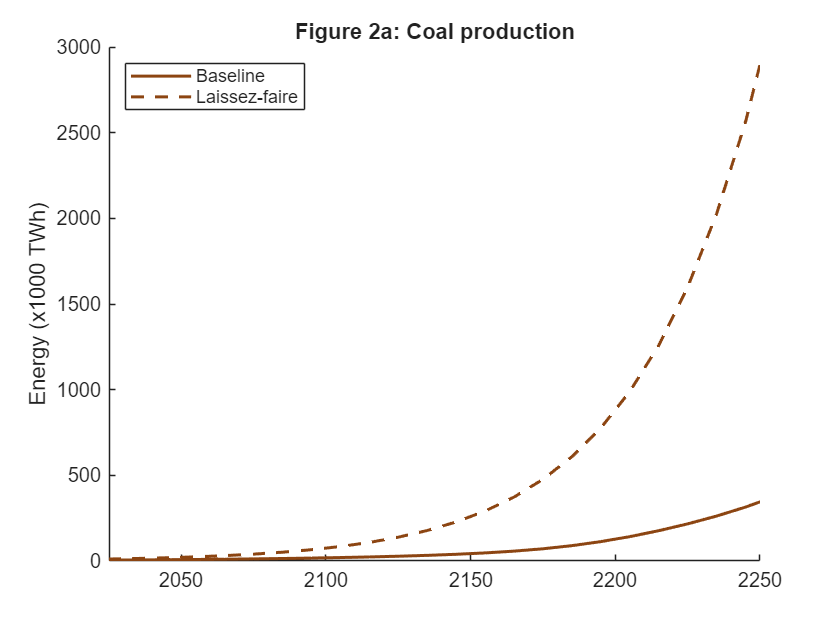

In [10]:
%----------------------------------------------------------------------

% %%%%//////////      FIGURES PART 1: THESIS RESULTS      \\\\\\\\\\\\%%%
terrared = [0.55 0.27 0.07];   % dark terra-like red (coal)
paleorange = [0.95 0.65 0.2];  % pale orange/yellow (oil)
greenlc = [0.2 0.7 0.3];       % green (low-carbon)


%% FIGURE 2A: Coal production: Optimal versus LF
load('coal_baseline.mat','coal_baseline');
load('coal_nestedcd_lf.mat','coal_nestedcd_lf');
z=30;
figure;
hold on;
plot(y2(1:z),coal_baseline(1:z),"-",'Color', terrared, 'LineWidth', 1.5);
plot(y2(1:z),coal_nestedcd_lf(1:z),"--",'Color', terrared, 'LineWidth', 1.5);
hold off;
ylabel('Energy (x1000 TWh)');
title('Figure 2a: Coal production');
legend({'Baseline', 'Laissez-faire'}, 'Location', 'northwest');
grid off;
xlim([2025 2250])

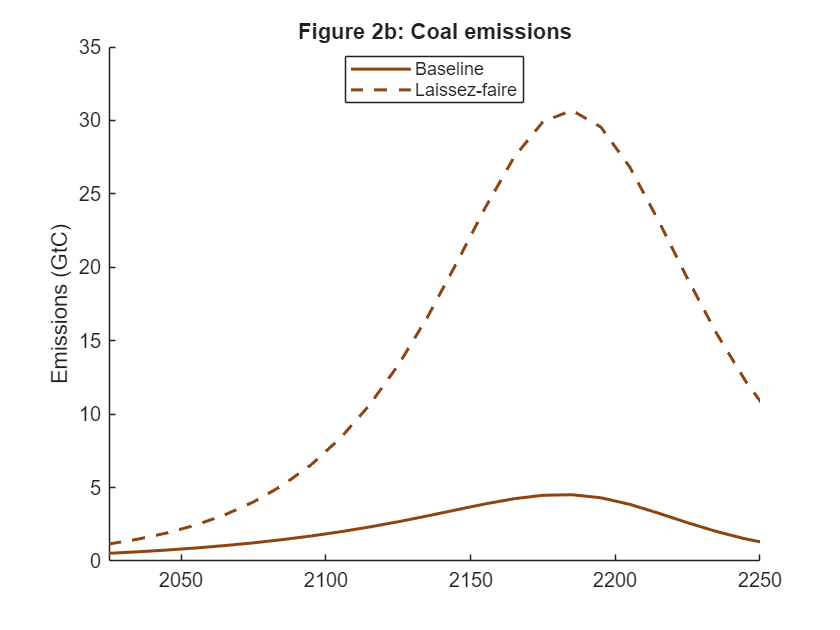

In [11]:
%% FIGURE 2B: Emissions Coal
load('coal_ghkt_v1.mat','coal_ghkt_v1');
load('emiss_coal_baseline.mat','emiss_coal_baseline');
load('emiss_coal_nestedcd_lf.mat','emiss_coal_nestedcd_lf');
z=30;
figure;
hold on;
plot(y2(1:z),emiss_coal_baseline(1:z),"-",'Color', terrared, 'LineWidth', 1.5);
plot(y2(1:z),emiss_coal_nestedcd_lf(1:z),"--",'Color', terrared, 'LineWidth', 1.5);
%plot(y2(1:z),coal_ghkt_v1(1:z),":",'Color', terrared, 'LineWidth', 1.5);
ylabel('Emissions (GtC)');
title('Figure 2b: Coal emissions');
legend({'Baseline', 'Laissez-faire'}, 'Location', 'best');
xlim([2025 2250])

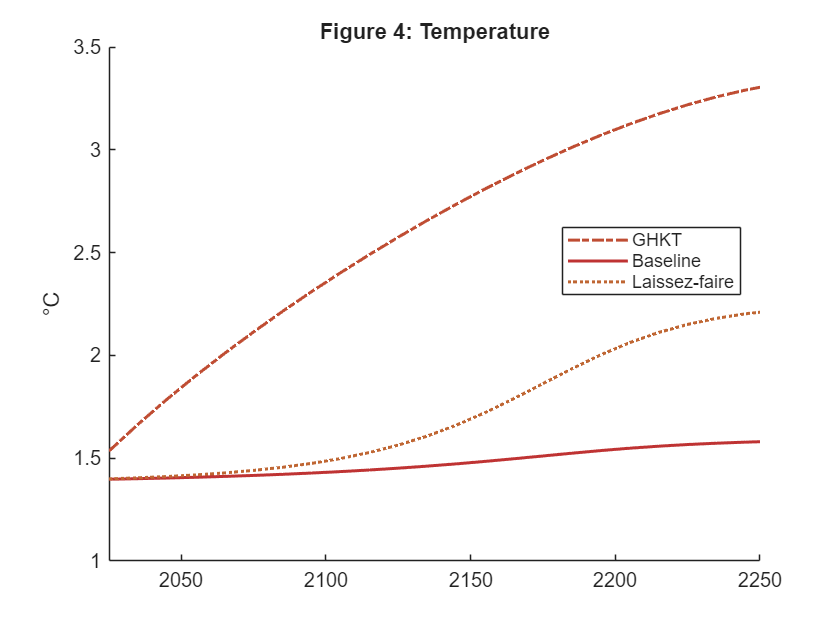

In [12]:
%% FIGURE 4: Temperature
load('temp_ghkt_v1.mat','temp_ghkt_v1')
load('temp_baseline.mat','temp_baseline');
load('temp_nestedcd_lf.mat', 'temp_nestedcd_lf')

z = 30;
figure;
hold on; 
plot(y2(1:z), temp_ghkt_v1(1:z),'-.','Color', [0.75 0.3 0.2],'Linewidth', 1.5);
plot(y2(1:z), temp_baseline(1:z),'-','Color', [0.75 0.2 0.2],'Linewidth', 1.5);
plot(y2(1:z), temp_nestedcd_lf(1:z),':','Color', [0.75 0.4 0.2],'Linewidth', 1.5);
hold off;
ylabel('{\circ}C');
title('Figure 4: Temperature');
legend({'GHKT','Baseline','Laissez-faire'}, 'Location', 'best');
xlim([2025 2250]);

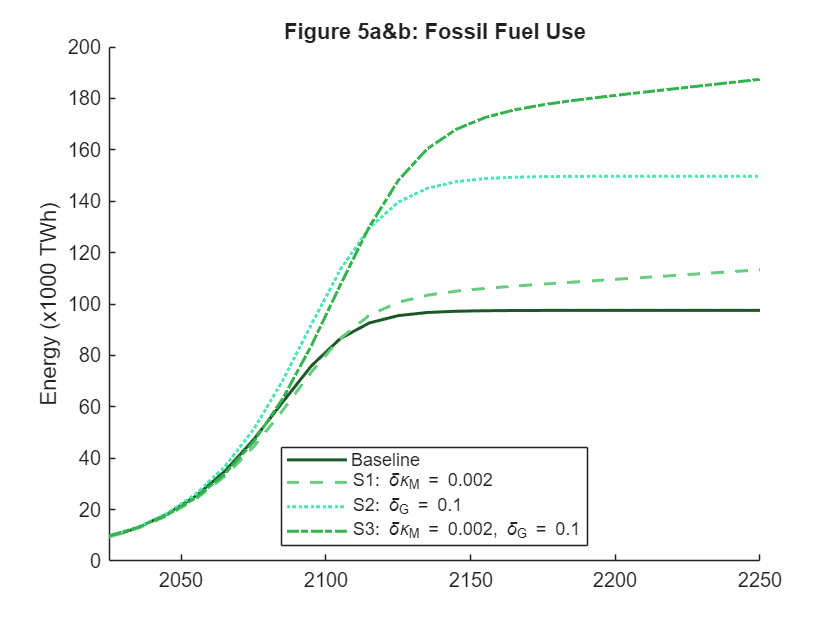

In [13]:
%% FIGURE 5A & 5B: Low carbon energy production
load('E3_baseline.mat','E3_baseline');
load('E3_nestedcd_lf.mat', 'E3_nestedcd_lf')
load('E3_dK.mat','E3_dK')
load('E3_dG.mat','E3_dG')
load('E3_dG_dK.mat','E3_dG_dK')
load('E3_dkdg_500.mat','E3_dkdg_500')
load('E3_dkdg_1000.mat','E3_dkdg_1000')
load('E3_enK.mat','E3_enK')
load('E3_effE.mat','E3_effE')
load('E3_enK_effE.mat', 'E3_enK_effE')
load('E3_enK_effE_dkdg.mat', 'E3_enK_effE_dkdg')
load('E3_enKy_effE_dkdg.mat', 'E3_enKy_effE_dkdg')

z = 30;
figure;
hold on; 
plot(y2(1:z), E3_baseline(1:z),'-','Color', [0.1 0.35 0.15],'Linewidth', 1.5);
plot(y2(1:z), E3_dK(1:z),'--','Color', [0.4 0.8 0.5],'Linewidth', 1.5);
plot(y2(1:z), E3_dG(1:z),':','Color', [0.3 0.9 0.7],'Linewidth', 1.5);
plot(y2(1:z), E3_dG_dK(1:z),'-.','Color', [0.2 0.7 0.3],'Linewidth', 1.5);
% plot(y2(1:z), E3_dkdg_500(1:z),'--','Color', [0.3 0.8 0.6],'Linewidth', 1.5);
% plot(y2(1:z), E3_dkdg_1000(1:z),':','Color', [0.4 0.7 0.4],'Linewidth', 1.5);
% plot(y2(1:z), E3_enK(1:z),'-.','Color', [0.1 0.5 0.4],'Linewidth', 1.5);
% plot(y2(1:z), E3_effE(1:z),':','Color', 'green','Linewidth', 1.5);
% plot(y2(1:z), E3_enK_effE(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% plot(y2(1:z), E3_enK_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% plot(y2(1:z), E3_enKy_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
hold off;
ylabel('Energy (x1000 TWh)');
title('Figure 5a&b: Fossil Fuel Use');
legend({'Baseline','S1: \delta\kappa_M = 0.002','S2: \delta_G = 0.1', 'S3: \delta\kappa_M = 0.002, \delta_G = 0.1'}, 'Location', 'best');
xlim([2025 2250]);

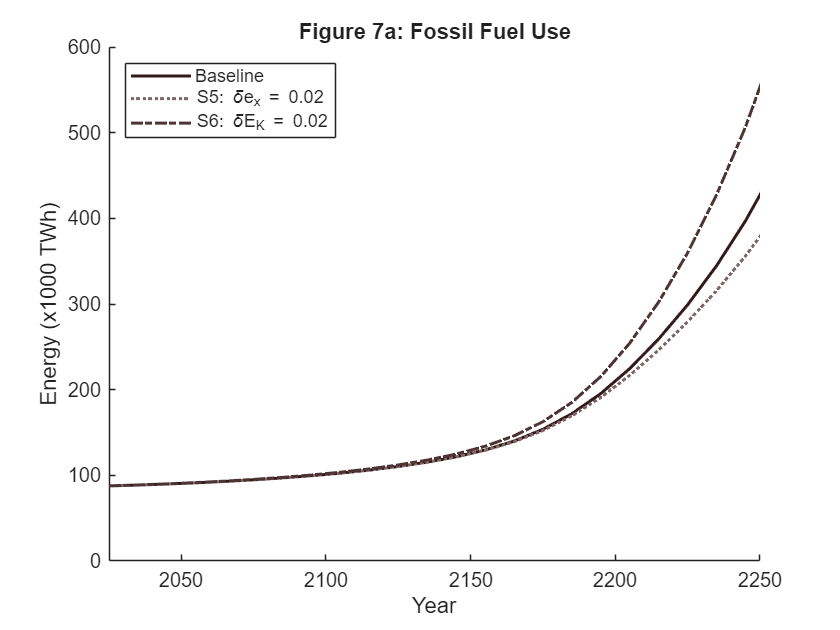

In [14]:
%% FIGURE 7A: Fossil fuel usage
load('fossil_fuel_baseline.mat','fossil_fuel_baseline');
load('fossil_fuel_nestedcd_lf.mat', 'fossil_fuel_nestedcd_lf')
load('fossil_fuel_dG_dK.mat','fossil_fuel_dG_dK')
load('fossil_fuel_enK.mat','fossil_fuel_enK')
load('fossil_fuel_effE.mat','fossil_fuel_effE')
load('fossil_fuel_enK_effE.mat','fossil_fuel_enK_effE')
load('fossil_fuel_enK_effE_dkdg.mat','fossil_fuel_enK_effE_dkdg')
load('fossil_fuel_enKy_effE_dkdg.mat','fossil_fuel_enKy_effE_dkdg')
z = 30;
figure;
hold on; 
plot(y2(1:z), fossil_fuel_baseline(1:z),'-','Color', [0.2 0.1 0.1],'Linewidth', 1.5);
%plot(y2(1:z), fossil_fuel_dK(1:z),'--','Color', [0.4 0.8 0.5],'Linewidth', 1.5);
%plot(y2(1:z), fossil_fuel_dG(1:z),':','Color', [0.3 0.9 0.7],'Linewidth', 1.5);
%plot(y2(1:z), fossil_fuel_dG_dK(1:z),'-.','Color', [0.2 0.7 0.3],'Linewidth', 1.5);
plot(y2(1:z), fossil_fuel_effE(1:z),':','Color', [0.5 0.4 0.4],'Linewidth', 1.5);
plot(y2(1:z), fossil_fuel_enK(1:z),'-.','Color', [0.3 0.2 0.2],'Linewidth', 1.5);
%plot(y2(1:z), fossil_fuel_enK_effE(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
%plot(y2(1:z), fossil_fuel_enK_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
%plot(y2(1:z), fossil_fuel_enKy_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
hold off;
xlabel('Year');
ylabel('Energy (x1000 TWh)');
title('Figure 7a: Fossil Fuel Use');
legend({'Baseline','S5: \deltae_x = 0.02','S6: \deltaE_K = 0.02'},'Location', 'northwest');
xlim([2025 2250]);

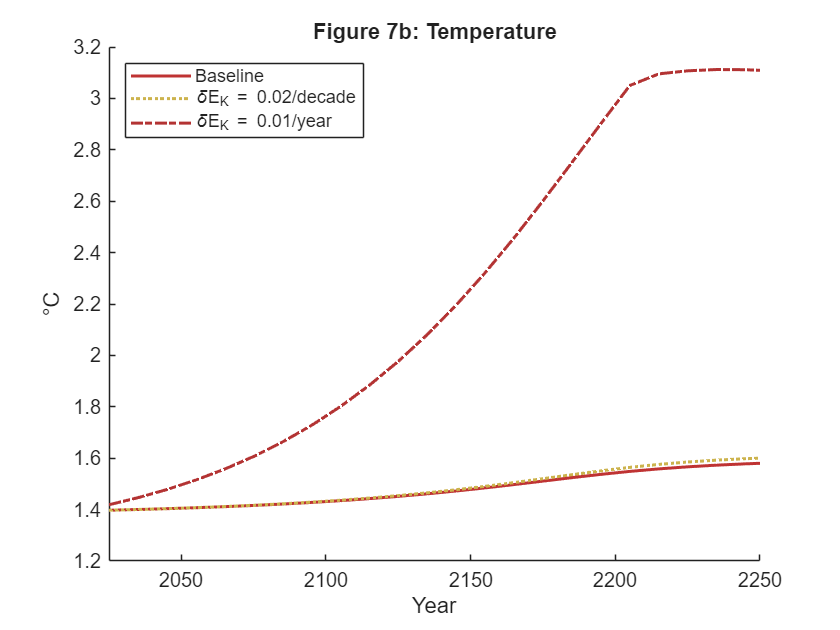

In [15]:
%% FIRUGE 7B: Temperature change
load('temp_baseline.mat','temp_baseline');
load('temp_enK_effE.mat','temp_enK_effE')
load('temp_enKy_effE_dkdg.mat','temp_enKy_effE_dkdg')

z = 30;
figure;
hold on; 
plot(y2(1:z), temp_baseline(1:z),'-','Color', [0.75 0.2 0.2],'Linewidth', 1.5);
plot(y2(1:z), temp_enK_effE(1:z),':','Color',[0.8 0.7 0.3],'Linewidth', 1.5);
plot(y2(1:z), temp_enKy_effE_dkdg(1:z),'-.','Color',[0.7 0.2 0.2],'Linewidth', 1.5);
hold off;
xlabel('Year');
ylabel('{\circ}C');
title('Figure 7b: Temperature');
legend({'Baseline','\deltaE_K = 0.02/decade','\deltaE_K = 0.01/year'}, 'Location', 'northwest');
xlim([2025 2250]);

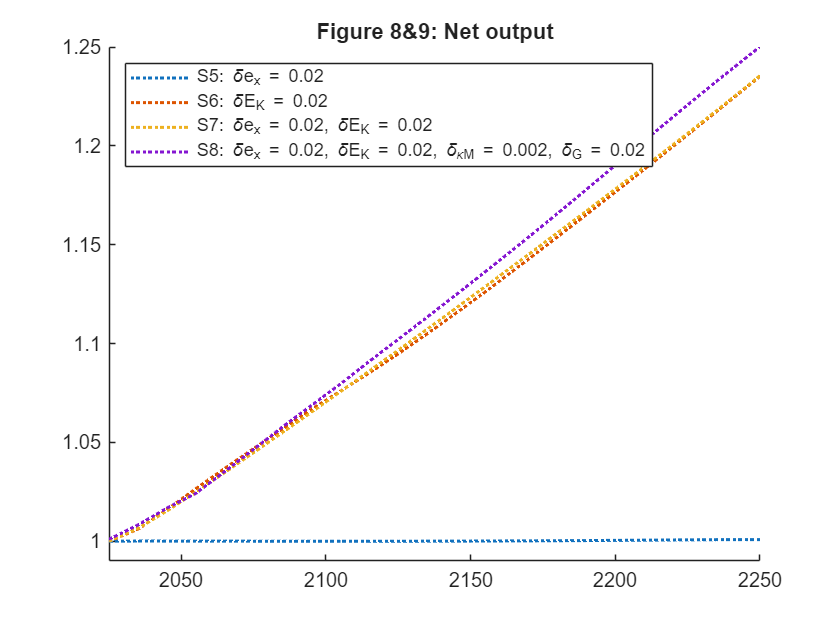

In [16]:
%% FIGURE 8: Net output
load('gdp_baseline.mat', 'gdp_baseline')
load('gdp_nestedcd_lf.mat', 'gdp_nestedcd_lf')
load('gdp_effE.mat', 'gdp_effE')
load('gdp_enK.mat', 'gdp_enK')
load('gdp_enK_effE.mat','gdp_enK_effE')
load('gdp_enK_effE_dkdg.mat','gdp_enK_effE_dkdg')
load('gdp_enKy_effE_dkdg.mat','gdp_enKy_effE_dkdg')

net_gdp_baseline = zeros(T,1);
net_gdp_effE = zeros(T,1);
net_gdp_enK = zeros(T,1);
net_gdp_enK_effE = zeros(T,1);
net_gdp_enK_effE_dkdg = zeros(T,1);
for i = 1:1:T;
   net_gdp_baseline(i) = gdp_baseline(i)/gdp_nestedcd_lf(i);
   net_gdp_effE(i) = gdp_effE(i)/gdp_baseline(i);
   net_gdp_enK(i) = gdp_enK(i)/gdp_baseline(i);
   net_gdp_enK_effE(i) = gdp_enK_effE(i)/gdp_baseline(i);
   net_gdp_enK_effE_dkdg(i) = gdp_enK_effE_dkdg(i)/gdp_baseline(i);
   net_gdp_enKy_effE_dkdg(i) = gdp_enK_effE_dkdg(i)/gdp_baseline(i);
end 

z = 25; 
figure; 
hold on;
%plot(y2(1:z), net_gdp_baseline(1:z),": ", 'LineWidth', 1.5);
plot(y2(1:z), net_gdp_effE(1:z),": ", 'LineWidth', 1.5);
plot(y2(1:z), net_gdp_enK(1:z),": ", 'LineWidth', 1.5);
plot(y2(1:z),  net_gdp_enK_effE(1:z),": ", 'LineWidth', 1.5);
plot(y2(1:z),  net_gdp_enK_effE_dkdg(1:z),": ", 'LineWidth', 1.5);
%plot(y2(1:z),  net_gdp_enKy_effE_dkdg(1:z),": ", 'LineWidth', 1.5);
hold off;
title('Figure 8&9: Net output');
xlim([2025 2250])
ylim([0.99 1.25])
legend({'S5: \deltae_x = 0.02','S6: \deltaE_K = 0.02','S7: \deltae_x = 0.02, \deltaE_K = 0.02','S8: \deltae_x = 0.02, \deltaE_K = 0.02, \delta_\kappa_M = 0.002, \delta_G = 0.02'},'Location', 'northwest');

%----------------------------------------------------------------------

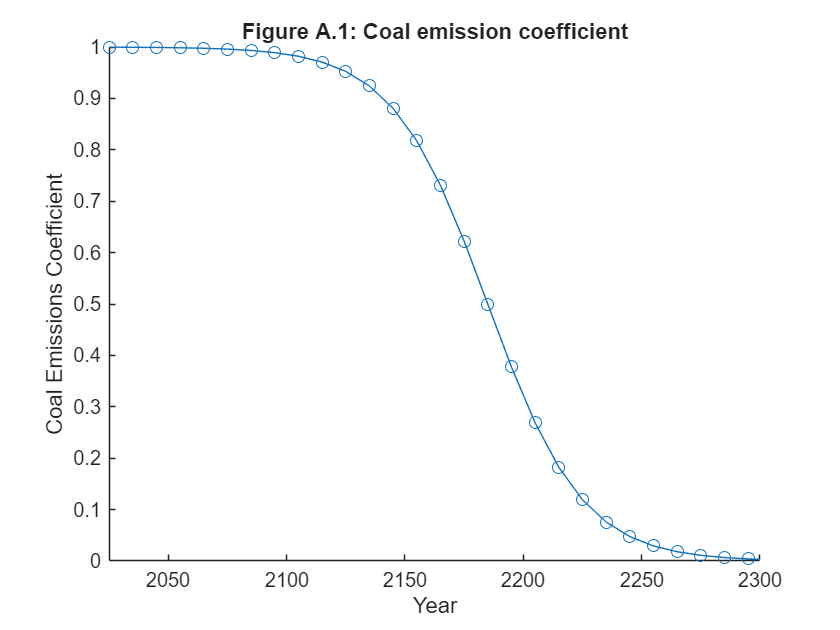

In [17]:
%%%%%%%%%%%%%%%%%%    Appendix Figures       %%%%%%%%%%%%%%%%%%%%

%%FIGURE A1: Coal emission coefficient
load('ypsilon_ghkt','ypsilon_ghkt');
z = 30;
figure;
hold on;
plot(y2(1:z),ypsilon_ghkt(1:z),'-o')
xlabel('Year','FontSize',11)
ylabel('Coal Emissions Coefficient','FontSize',11)
title('Figure A.1: Coal emission coefficient');
grid off;
xlim([2025 2300]);

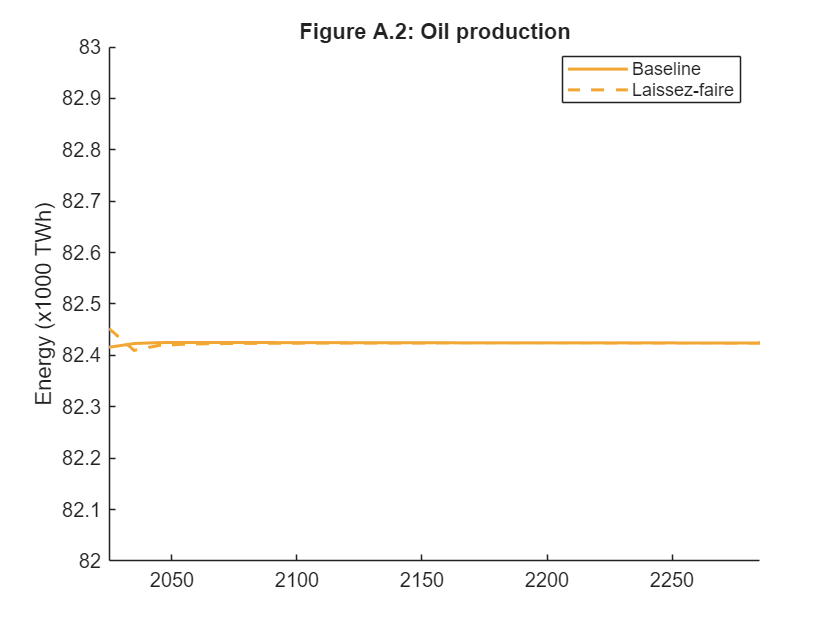

In [23]:
%% FIGURE A2: OIL PRODUCTION: OPTIMAL VS LF 

load('oil_baseline.mat','oil_baseline');
load('oil_nestedcd_lf.mat','oil_nestedcd_lf');
z=30;
figure;
hold on;
plot(y2(1:z),oil_baseline(1:z),"-",'Color', paleorange, 'LineWidth', 1.5);
plot(y2(1:z),oil_nestedcd_lf(1:z),"--",'Color', paleorange, 'LineWidth', 1.5);
ylabel('Energy (x1000 TWh)');
title('Figure A.2: Oil production');
legend({'Baseline', 'Laissez-faire'}, 'Location', 'best');
xlim([2025 2285])
ylim([82 83])

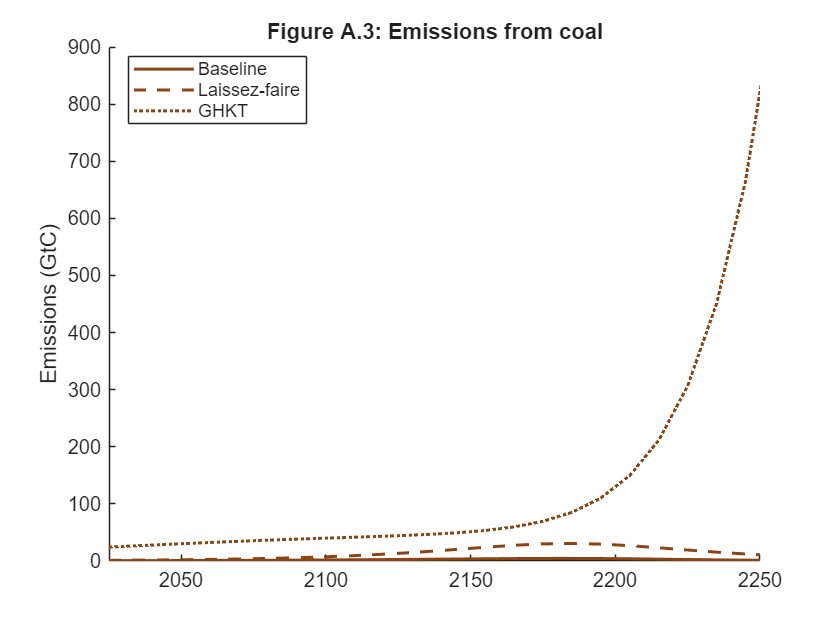

In [24]:
%% Figure A3:
load('coal_ghkt_v1.mat','coal_ghkt_v1');
load('emiss_coal_baseline.mat','emiss_coal_baseline');
load('emiss_coal_nestedcd_lf.mat','emiss_coal_nestedcd_lf');
z=30;
figure;
hold on;
plot(y2(1:z),emiss_coal_baseline(1:z),"-",'Color', terrared, 'LineWidth', 1.5);
plot(y2(1:z),emiss_coal_nestedcd_lf(1:z),"--",'Color', terrared, 'LineWidth', 1.5);
plot(y2(1:z),coal_ghkt_v1(1:z),":",'Color', terrared, 'LineWidth', 1.5);
ylabel('Emissions (GtC)');
title('Figure A.3: Emissions from coal');
legend({'Baseline', 'Laissez-faire','GHKT'}, 'Location', 'best');
xlim([2025 2250])

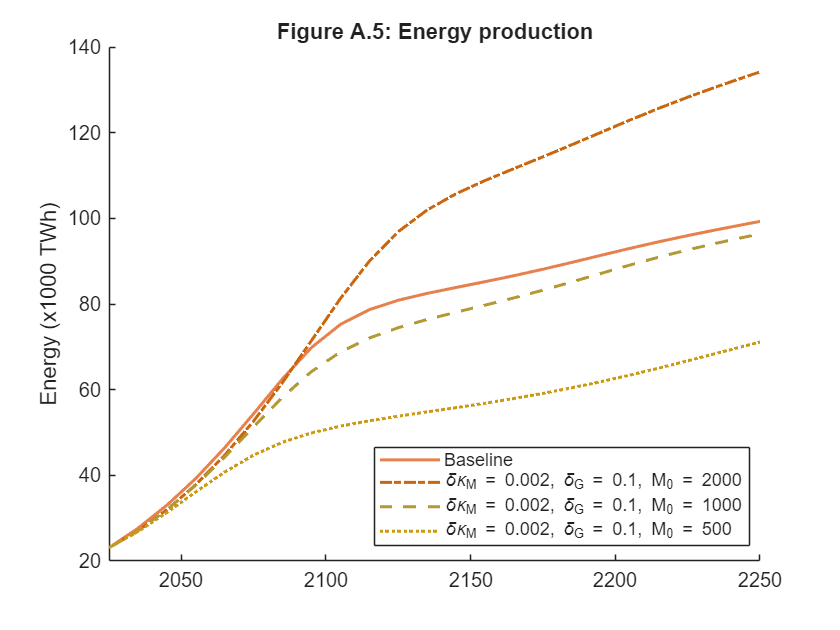

In [25]:
%% Figure A4: 

%% Figure A5: 
%%%%%%%%%%%% ///// ENERGY USE all scenarios \\\\\ %%%%%%%%%%%%%%%%%%%%%
load('energy_baseline.mat','energy_baseline');
load('energy_dK.mat','energy_dK')
load('energy_dG.mat','energy_dG')
load('energy_dG_dK.mat','energy_dG_dK')
load('energy_enK.mat', 'energy_enK')
load('energy_dkdg_1000.mat', 'energy_dkdg_1000')
load('energy_dkdg_500.mat','energy_dkdg_500')
load('energy_effE.mat', 'energy_effE')
load('energy_enK_effE.mat', 'energy_enK_effE')
load('energy_enK_effE_dkdg.mat', 'energy_enK_effE_dkdg')
load('energy_enKy_effE_dkdg.mat', 'energy_enKy_effE_dkdg')
z = 30;
figure;
hold on; 
plot(y2(1:z), energy_baseline(1:z),'-','Color',[0.9 0.5 0.3],'Linewidth', 1.5);
% plot(y2(1:z), energy_dK(1:z),'--','Color',[0.7 0.6 0.2],'Linewidth', 1.5);
% plot(y2(1:z), energy_dG(1:z),':','Color',[0.6 0.7 0.3],'Linewidth', 1.5);
plot(y2(1:z), energy_dG_dK(1:z),'-.','Color', [0.8 0.4 0.05],'Linewidth', 1.5);
% plot(y2(1:z), energy_enK(1:z),'-.','Color', [0.7 0.6 0.2],'Linewidth', 1.5);
% plot(y2(1:z), energy_effE(1:z),':','Color','red','Linewidth', 1.5);
% plot(y2(1:z), energy_enK_effE(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% plot(y2(1:z), energy_enK_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% plot(y2(1:z), energy_enKy_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
plot(y2(1:z), energy_dkdg_1000(1:z),'--','Color',[0.7 0.6 0.2],'Linewidth', 1.5);
plot(y2(1:z), energy_dkdg_500(1:z),':','Color',[0.8 0.6 0.07],'Linewidth', 1.5);
hold off;
ylabel('Energy (x1000 TWh)');
title('Figure A.5: Energy production');
legend({'Baseline','\delta\kappa_M = 0.002, \delta_G = 0.1, M_0 = 2000','\delta\kappa_M = 0.002, \delta_G = 0.1, M_0 = 1000','\delta\kappa_M = 0.002, \delta_G = 0.1, M_0 = 500'}, 'Location', 'best');
xlim([2025 2250]);
% 

In [21]:
%----------------------------------------------------------------------

%%%%%%%%%%%%%%%%%%    Additional Figures       %%%%%%%%%%%%%%%%%%%%

%%%// EMISSIONS: from oil
% load('oil_ghkt_v1.mat','oil_ghkt_v1');
% load('emiss_oil_baseline.mat','emiss_oil_baseline');
% load('emiss_oil_nestedcd_lf.mat','emiss_oil_nestedcd_lf');
% z=30;
% figure;
% plot(y2(1:z),emiss_oil_baseline(1:z),"-",'Color',paleorange,'LineWidth', 1.5);
% hold on;
% plot(y2(1:z),emiss_oil_nestedcd_lf(1:z),"--",'Color',paleorange,'LineWidth', 1.5);
% plot(y2(1:z),oil_ghkt_v1(1:z),":",'Color',paleorange, 'LineWidth', 1.5);
% ylabel('Emissions');
% xlabel('Time');
% title('Emissions from oil');
% legend({'Baseline', 'Laissez-faire','GHKT'}, 'Location', 'best');
% xlim([2025 2300])

%%%// MINERALS: all scenarios
% load('mineral_baseline.mat','mineral_baseline');
% load('mineral_nestedcd_lf.mat', 'mineral_nestedcd_lf')
% load('mineral_dK.mat','mineral_dK')
% load('mineral_dG.mat','mineral_dG')
% load('mineral_dG_dK.mat','mineral_dG_dK')
% load('mineral_enK.mat','mineral_enK')
% load('mineral_effE.mat','mineral_effE')
% load('mineral_enK_effE.mat', 'mineral_enK_effE')
% load('mineral_enK_effE_dkdg.mat', 'mineral_enK_effE_dkdg')
% load('mineral_enKy_effE_dkdg.mat', 'mineral_enKy_effE_dkdg')
%
% z = 20;
% figure;
% hold on; 
% plot(y2(1:z), mineral_baseline(1:z),'-','Color', [0.1 0.35 0.15],'Linewidth', 1.5);
% %plot(y2(1:z), mineral_dK(1:z),'--','Color', [0.4 0.8 0.5],'Linewidth', 1.5);
% %plot(y2(1:z), mineral_dG(1:z),':','Color', [0.3 0.9 0.7],'Linewidth', 1.5);
% plot(y2(1:z), mineral_dG_dK(1:z),'-.','Color', [0.2 0.7 0.3],'Linewidth', 1.5);
% plot(y2(1:z), mineral_enK(1:z),'-.','Color', [0.1 0.5 0.4],'Linewidth', 1.5);
% plot(y2(1:z), mineral_effE(1:z),':','Color','green','Linewidth', 1.5);
% plot(y2(1:z), mineral_enK_effE(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% plot(y2(1:z), mineral_enK_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% plot(y2(1:z), mineral_enKy_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% hold off;
% xlabel('Year');
% ylabel('MtCu');
% title('Mineral Use');
% legend({'Baseline','Changing \kappa_M & \delta_G','EnK','effE', 'EnK + effE','EnK + effE +dkdg'}, 'Location', 'best');
% xlim([2025 2225]);
% ylim([60.5 60.7]);

%%%// GDP: all scenarios 
% %----------- absolute
% load('Yt_ghkt_v1.mat','Yt_ghkt_v1');
% load('gdp_baseline.mat','gdp_baseline');
% load('gdp_nestedcd_lf.mat','gdp_nestedcd_lf');
% load('gdp_dK.mat','gdp_dK');
% load('gdp_dG.mat','gdp_dG');
% load('gdp_dG_dK.mat','gdp_dG_dK');
% load('gdp_enK.mat', 'gdp_enK');
% load('gdp_effE.mat', 'gdp_effE');
% load('gdp_enK_effE.mat', 'gdp_enK_effE');
% load('gdp_enK_effE_dkdg.mat', 'gdp_enK_effE_dkdg');
% load('gdp_enKy_effE_dkdg.mat', 'gdp_enKy_effE_dkdg');
% z = 30; 
% figure; hold on;
% plot(y2(1:z), gdp_baseline(1:z),"-", 'LineWidth', 1.5);
% %plot(y2(1:z), gdp_nestedcd_lf(1:z),"--",'LineWidth',1.5);
% %plot(y2(1:z), Yt_ghkt_v1(1:z),": ", 'LineWidth', 1.5);
% %plot(y2(1:z), gdp_dG_dK(1:z),": ", 'LineWidth', 1.5);
% %plot(y2(1:z), gdp_dK(1:z),": ", 'LineWidth', 1.5);
% %plot(y2(1:z), gdp_dG(1:z),": ", 'LineWidth', 1.5);
% plot(y2(1:z), gdp_enK(1:z),'-.','Linewidth', 1.5);
% plot(y2(1:z), gdp_effE(1:z),'-.','Linewidth', 1.5);
% plot(y2(1:z), gdp_enK_effE(1:z),':','Linewidth', 1.5);
% plot(y2(1:z), gdp_enK_effE_dkdg(1:z),':','Linewidth', 1.5);
% plot(y2(1:z), gdp_enKy_effE_dkdg(1:z),':','Linewidth', 1.5);
% hold off;
% xlabel('Year', 'FontSize', 11);
% ylabel('GDP (billion $)', 'FontSize', 11);
% title('GDP');
% legend('Location', 'best');
% xlim([2025 2300]);
% ylim([400000 1100000]);

%%%// EMISSIONS: all scenarios 
% load('carbon_baseline.mat','carbon_baseline');
% load('carbon_nestedcd_lf.mat', 'carbon_nestedcd_lf')
% load('carbon_dK.mat','carbon_dK')
% load('carbon_dG.mat','carbon_dG')
% load('carbon_dG_dK.mat','carbon_dG_dK')
% load('carbon_enK.mat','carbon_enK')
% load('carbon_effE.mat','carbon_effE')
% load('carbon_enK_effE.mat','carbon_enK_effE')
% load('carbon_enKy_effE_dkdg.mat','carbon_enKy_effE_dkdg')
% z = 25;
% figure;
% hold on; 
% plot(y2(1:z), carbon_baseline(1:z),'-','Color', [0.1 0.35 0.15],'Linewidth', 1.5);
% %plot(y2(1:z), carbon_dK(1:z),'--','Color', [0.4 0.8 0.5],'Linewidth', 1.5);
% %plot(y2(1:z), carbon_dG(1:z),':','Color', [0.3 0.9 0.7],'Linewidth', 1.5);
% % plot(y2(1:z), carbon_dG_dK(1:z),'-.','Color', [0.2 0.7 0.3],'Linewidth', 1.5);
% % plot(y2(1:z), carbon_enK(1:z),'-.','Color', [0.1 0.5 0.4],'Linewidth', 1.5);
% % plot(y2(1:z), carbon_effE(1:z),'-.','Color', 'green','Linewidth', 1.5);
% % plot(y2(1:z), carbon_enK_effE(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% % plot(y2(1:z), carbon_enKy_effE_dkdg(1:z),':','Color',[0.4 0.8 0.5],'Linewidth', 1.5);
% hold off;
% xlabel('Year');
% ylabel('GtC');
% title('Emissions');
% legend({'Baseline','Changing \kappa_M & \delta_G','EnK','effE','EnK + effE'}, 'Location', 'best');
% xlim([2025 2250]);

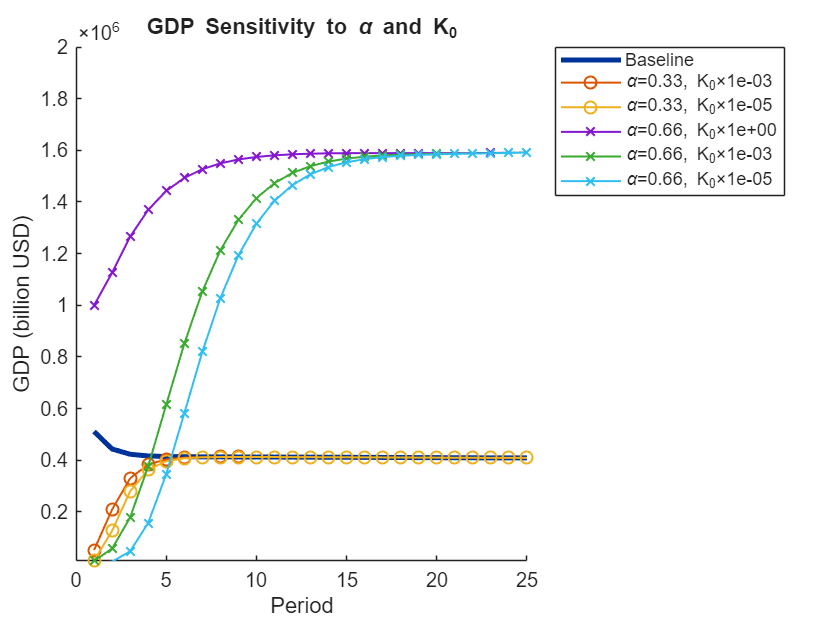

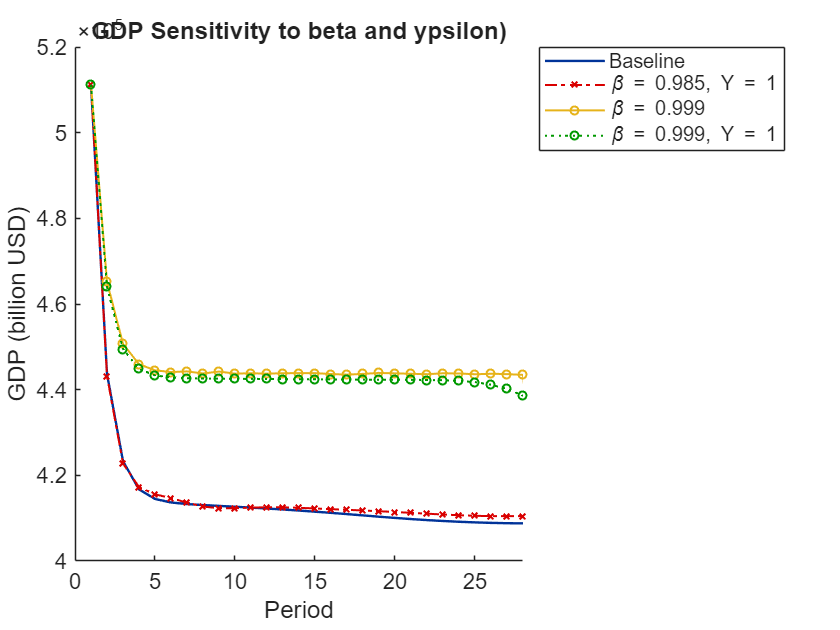

Full comparison of savings rates over time:
    Period    Baseline    LaissezFaire    enK_effE    beta999_ypsilon1
    ______    ________    ____________    ________    ________________

       1      0.28381       0.28383       0.28377         0.32457     
       2      0.28379       0.28384       0.28379         0.32484     
       3      0.28381       0.28383        0.2838         0.32489     
       4      0.28382       0.28383       0.28382         0.32498     
       5      0.28384       0.28385       0.28384         0.32498     
       6      0.28386       0.28386       0.28386         0.32498     
       7      0.28389       0.28389       0.28389         0.32496     
       8      0.28392       0.28392       0.28392         0.32495     
       9      0.28395       0.28395       0.28395         0.32493     
      10      0.28399       0.28399       0.28399         0.32491     
      11      0.28403       0.28403       0.28403          0.3249     
      12      0.28409       0.28

In [22]:

%----------------------------------------------------------------------

%%%%%%%%%%%%%%%%%%    Start Sensitivity        %%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


%% Sensitivity: alpha and K0 impact on GDP
%   To replicate result from the sensitivity analysis, make sure
%   that the baseline scenario is activated.

alpha_values = [0.33, 0.66];
K0_factors   = [1, 1/1000, 1/100000];

results_alphaK0 = struct();
idx = 0;

for a = alpha_values
    for kf = K0_factors
        idx = idx + 1;

        alpha_try = a;
        K0_try    = K0 * kf;  % K0 in same units as original

        % Preallocate
        Yt_try = zeros(T,1);
        GDP_try = zeros(T,1);
        Kt1_try = zeros(T,1);

        % Period 1
        Yt_try(1) = (exp((-gamma(1))*(St(1)-Sbar))) * ...
                    (min(en_K(1)*K0_try, eff_E(1)*energy(1))^alpha_try) * ...
                    ((1 - x(2*(T-1)+1) - x(2*(T-1)+T+1))*N)^(1-alpha_try);

        GDP_try(1) = Yt_try(1) / eta_GDP;  
        Kt1_try(1) = x(1)*GDP_try(1) + (1-Delta)*K0_try;

        % Periods 2..T
        for i = 2:T
            Yt_try(i) = (exp((-gamma(i))*(St(i)-Sbar))) * ...
                        (min(en_K(i)*Kt1_try(i-1), eff_E(i)*energy(i))^alpha_try) * ...
                        ((1 - x(2*(T-1)+i) - x(2*(T-1)+T+i))*N)^(1-alpha_try);

            GDP_try(i) = Yt_try(i) / eta_GDP;

            if i < T
                Kt1_try(i) = x(i)*GDP_try(i) + (1-Delta)*Kt1_try(i-1);
            end
        end

        % Store results
        results_alphaK0(idx).alpha = alpha_try;
        results_alphaK0(idx).K0_factor = kf;
        results_alphaK0(idx).GDP = GDP_try;
    end
end

%% ==================== Plot GDP paths ====================

figure; hold on;

% Identify baseline index (alpha=0.33, K0_factor=1)
baseline_idx = find([results_alphaK0.alpha] == 0.33 & [results_alphaK0.K0_factor] == 1, 1);

% Plot all scenarios
for j = 1:length(results_alphaK0)
    lab = sprintf('\\alpha=%.2f, K_0×%.0e', ...
                  results_alphaK0(j).alpha, results_alphaK0(j).K0_factor);

    if j == baseline_idx
        % Baseline: thick dark blue line, no markers
        plot(results_alphaK0(j).GDP, 'LineWidth', 2.5, ...
            'Color', [0 0.2 0.6], 'DisplayName', 'Baseline');
    else
        % Marker by alpha
        if results_alphaK0(j).alpha == 0.33
            mark = 'o'; % Circle
        else
            mark = 'x'; % Cross
        end

        plot(results_alphaK0(j).GDP, ['-' mark], 'LineWidth', 1, ...
            'DisplayName', lab);
    end
end

xlabel('Period');
ylabel('GDP (billion USD)');
legend('show', 'Location', 'bestoutside');
title('GDP Sensitivity to \alpha and K_0');
grid on;
xlim([0 25]);
ylim([1e4 2e6]); % Adjust for your GDP scale
grid off;
hold off;


%%%%%%%%%%%%%%%%%    Sensitivity: ypsilon impact on coal & temp    %%%%%%%%%%%%%%%%%%%%

%% Save new runs
% label_baseline = 'Baseline';
% GDP_baseline = GDP;
% temp_baseline = temp;
% emiss_baseline = emiss;
% y2_baseline = y2;
% save('sens_baseline.mat', 'GDP_baseline','temp_baseline','emiss_baseline','y2_baseline','label_baseline');


%% === After high beta optimization ===
% label_betahigh = '\beta\uparrow';
% gdp_betahigh = GDP;
% temp_betahigh = temp;
% emiss_betahigh = emiss;
% y2_betahigh = y2;
% save('sens_betahigh.mat', 'GDP_betahigh','temp_betahigh','emiss_betahigh','y2_betahigh','label_betahigh');

% %% === After high ypsilon optimization ===
% label_ypsilonhigh = '\upsilon_{coal}\uparrow';
% GDP_ypsilonhigh = GDP;
% temp_ypsilonhigh = temp;
% emiss_ypsilonhigh = emiss;
% y2_ypsilonhigh = y2;
% save('sens_ypsilonhigh.mat', 'GDP_ypsilonhigh','temp_ypsilonhigh','emiss_ypsilonhigh','y2_ypsilonhigh','label_ypsilonhigh');

% %% === After high beta + high ypsilon optimization ===
% label_betahigh_ypsilonhigh = '\beta\uparrow + \upsilon_{coal}\uparrow';
% GDP_betahigh_ypsilonhigh = GDP;
% temp_betahigh_ypsilonhigh = temp;
% emiss_betahigh_ypsilonhigh = emiss;
% y2_betahigh_ypsilonhigh = y2;
% save('sens_betahigh_ypsilonhigh.mat', ...
%      'GDP_betahigh_ypsilonhigh','temp_betahigh_ypsilonhigh','emiss_betahigh_ypsilonhigh','y2_betahigh_ypsilonhigh','label_betahigh_ypsilonhigh');

%% === Load all scenario results ===
load('sens_baseline.mat');
load('sens_betahigh.mat');
load('sens_ypsilonhigh.mat');
load('sens_betahigh_ypsilonhigh.mat');

%% === Sensitivity comparison (first 30 periods) ===
z = 30;

% Ensure column vectors
GDP_baseline              = GDP_baseline(:);
GDP_betahigh              = GDP_betahigh(:);
GDP_ypsilonhigh           = GDP_ypsilonhigh(:);
GDP_betahigh_ypsilonhigh  = GDP_betahigh_ypsilonhigh(:);

temp_baseline             = temp_baseline(:);
temp_betahigh             = temp_betahigh(:);
temp_ypsilonhigh          = temp_ypsilonhigh(:);
temp_betahigh_ypsilonhigh = temp_betahigh_ypsilonhigh(:);

% Clamp to the shortest available length
z = min([z, numel(GDP_baseline), numel(GDP_betahigh), ...
            numel(GDP_ypsilonhigh), numel(GDP_betahigh_ypsilonhigh)]);

t = (1:z);

%% === GDP Comparison (tab 1) ===
figure('Name','GDP Sensitivity (β, υ)','NumberTitle','off');
hold on; grid off;

% --- Baseline (dark blue, no markers)
plot(t, GDP_baseline(1:z), '-', 'Color',[0 0.2 0.6], 'LineWidth', 1.2, ...
     'DisplayName','Baseline');

% --- υ high (red, X)
plot(t, GDP_ypsilonhigh(1:z), '-.x', 'Color',[0.85 0 0], 'LineWidth', 1.0, ...
     'MarkerSize',4, 'DisplayName','\beta = 0.985, \Upsilon = 1');


% --- β high (gold, circle)
plot(t, GDP_betahigh(1:z), '-o', 'Color',[0.9 0.7 0.1], 'LineWidth', 1.0, ...
     'MarkerSize',4, 'DisplayName','\beta = 0.999');

% --- β high + υ high (green, circle)
plot(t, GDP_betahigh_ypsilonhigh(1:z), ':o', 'Color',[0 0.6 0], 'LineWidth', 1.0, ...
     'MarkerSize',4, 'DisplayName','\beta = 0.999, \Upsilon = 1');

xlabel('Period');
ylabel('GDP (billion USD)');
title('GDP Sensitivity to beta and ypsilon)');
legend('Location','bestoutside');
xlim([0 28])
set(gca,'FontSize',11);


% %% === Temperature Comparison (tab 2) ===
% figure('Name','Temperature Sensitivity (β, υ)','NumberTitle','off');
% hold on; grid off;
% 
% % --- Baseline
% plot(t, temp_baseline(1:z), '-', 'Color',[0 0.2 0.6], 'LineWidth', 1.2, ...
%      'DisplayName','Baseline');
% 
% % --- υ high (red, X)
% plot(t, temp_ypsilonhigh(1:z), '-.x', 'Color',[0.85 0 0], 'LineWidth', 1.0, ...
%      'MarkerSize',4, 'DisplayName','\beta = 0.985, \Upsilon = 1');
% 
% % --- β high (gold, circle)
% plot(t, temp_betahigh(1:z), '--o', 'Color',[0.9 0.7 0.1], 'LineWidth', 1.0, ...
%      'MarkerSize',4, 'DisplayName','\beta = 0.999');
% 
% 
% % --- β high + υ high (green, circle)
% plot(t, temp_betahigh_ypsilonhigh(1:z), ':o', 'Color',[0 0.6 0], 'LineWidth', 1.0, ...
%      'MarkerSize',4, 'DisplayName','\beta = 0.999, \upsilon = 1');
% 
% xlabel('Period');
% ylabel('Temperature (°C above preindustrial)');
% title('Temperature under Sensitivity Scenarios (P1–P30)');
% legend('Location','bestoutside');
% xlim([0 28])
% set(gca,'FontSize',11);


%% Check savings rates
% === Load saved savings rate vectors ===
load('r_baseline.mat', 'r_baseline');
load('r_nestedcd_lf.mat', 'r_nestedcd_lf');
load('r_enK_effE.mat', 'r_enK_effE');
load('r_beta999_ypsilon1.mat', 'r_beta999_ypsilon1');

% === Automatically determine common time horizon (shortest vector length) ===
T = min([length(r_baseline), length(r_nestedcd_lf), length(r_enK_effE), length(r_beta999_ypsilon1)]);
t = (1:T)';

% === Combine into table ===
savings_table = table(t, ...
    r_baseline(1:T), ...
    r_nestedcd_lf(1:T), ...
    r_enK_effE(1:T), ...
    r_beta999_ypsilon1(1:T), ...
    'VariableNames', {'Period', 'Baseline', 'LaissezFaire', 'enK_effE', 'beta999_ypsilon1'});

% === Display the full table ===
disp('Full comparison of savings rates over time:');
disp(savings_table);

% === Create summary of initial values ===
summary_table = table( ...
    r_baseline(1), ...
    r_nestedcd_lf(1), ...
    r_enK_effE(1), ...
    r_beta999_ypsilon1(1), ...
    'VariableNames', {'Baseline', 'LaissezFaire', 'enK_effE', 'beta999_ypsilon1'});

disp(' ');
disp('Summary: Initial savings rate (t=1) in each scenario:');
disp(summary_table);
